# Spectrum Visualization Using PCA and T-SNE

> Import

In [1]:
import sys
sys.executable
# sys.path

'/home/shinanliu/env/bin/python'

In [2]:
# If you want to do multiprocessing, justing run the following cell
# And change all np into cp
# !pip install cupy
# import cupy as np

In [3]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

%config InlineBackend.figure_format = 'retina'

> Get Data

In [55]:
# Modify this cell in order to load customized data.

normal_filename = 'campus_drive_normal.npy'
fbs_filename = 'campus_drive_LOS-5M-USRP1_1599_abnormal.npy'
cso_filename = 'campus_drive_sigOver_10ms_1599_abnormal.npy'
jamming_filename = 'ryerson_ab_train_0208_anomaly_abnormal.npy'
# abnormal_filename = 'ryerson_ab_train_searle_1599_abnormal.npy'

In [56]:
path = '/net/adv_spectrum/array_data/'
normal_path = path + normal_filename
fbs_path = path + fbs_filename
cso_path = path + cso_filename
jamming_path = path + jamming_filename

X_normal = np.load(normal_path)
print('Normal data is loaded.')
print(np.shape(X_normal))
X_fbs = np.load(fbs_path)
print('FBS data is loaded.')
X_cso = np.load(cso_path)
print('CSO data is loaded.')
X_jamming = np.load(jamming_path)
print('Jamming data is loaded.')

Normal data is loaded.
(319, 1000, 128)
FBS data is loaded.
CSO data is loaded.
Jamming data is loaded.


In [57]:
# Remove or modify [:30] if you want to use the full dataset.
# You could modify the 128 * 10 into 128 * 100, 128 * 1000 or so.

X_normal = X_normal[:30].reshape(-1, 128 * 10)
X_fbs = X_fbs[:30].reshape(-1, 128 * 10)
X_cso = X_cso[:30].reshape(-1, 128 * 10)
X_jamming = X_jamming[:30].reshape(-1, 128 * 10)
X = np.vstack((X_normal, X_jamming , X_fbs, X_cso))

In [58]:
y_normal = ['Normal']*(X_normal.shape[0])
y_fbs = ['FBS']*(X_fbs.shape[0])
y_cso = ['CSO']*(X_cso.shape[0])
y_jamming = ['Jamming']*(X_jamming.shape[0])
y = np.concatenate((y_normal, y_jamming, y_fbs, y_cso))

In [59]:
print(np.shape(X))

(12000, 1280)


> Run dimension reduction.

In [60]:
# PCA here serves as a initial dimension reduction.
# It can make t-sne converge faster.
# You can comment out this cell to see how results change.

pca = PCA(n_components=50)
X = pca.fit_transform(X) 

In [61]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000)

In [62]:
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 12000 samples in 0.044s...
[t-SNE] Computed neighbors for 12000 samples in 7.785s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12000
[t-SNE] Computed conditional probabilities for sample 2000 / 12000
[t-SNE] Computed conditional probabilities for sample 3000 / 12000
[t-SNE] Computed conditional probabilities for sample 4000 / 12000
[t-SNE] Computed conditional probabilities for sample 5000 / 12000
[t-SNE] Computed conditional probabilities for sample 6000 / 12000
[t-SNE] Computed conditional probabilities for sample 7000 / 12000
[t-SNE] Computed conditional probabilities for sample 8000 / 12000
[t-SNE] Computed conditional probabilities for sample 9000 / 12000
[t-SNE] Computed conditional probabilities for sample 10000 / 12000
[t-SNE] Computed conditional probabilities for sample 11000 / 12000
[t-SNE] Computed conditional probabilities for sample 12000 / 12000
[t-SNE] Mean sigma: 4.402455
[t-SNE] KL divergenc

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

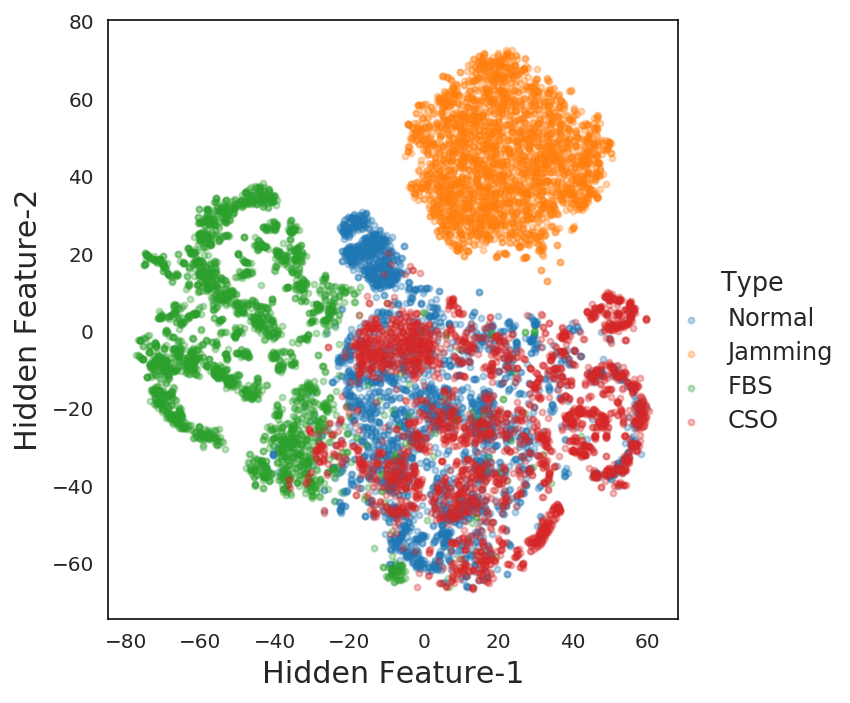

In [63]:
df_tsne = pd.DataFrame(tsne_results, columns=['Hidden Feature-1', 'Hidden Feature-2'])
df_tsne['Type'] = y
markers=['.', '.', '.', '.']
sns.set_style("white", {'axes.linewidth': 5, 'axes.edgecolor':'black'})
g = sns.lmplot(x='Hidden Feature-1', y='Hidden Feature-2', markers = markers, 
           data=df_tsne, hue='Type', fit_reg=False, scatter_kws={'alpha':0.3})
sns.despine(top=False, right=False)
# a.axes.set_title("",fontsize=16)
# a.set_xlabel("Hidden Feature-1",fontsize=12)
# a.set_ylabel("Hidden Feature-2",fontsize=12)
plt.setp(g._legend.get_texts(), fontsize=12)
# a.tick_params(labelsize=5)
plt.savefig('mobile_tsne.eps', dpi=1200, format='eps')

In [64]:
df_tsne

Hidden Feature-1  Hidden Feature-2    Type
0            -16.393375        -24.861740  Normal
1            -15.445164        -24.754547  Normal
2            -12.624755        -34.852585  Normal
3            -15.343017        -29.387606  Normal
4             -6.553510        -20.847969  Normal
...                 ...               ...     ...
11995         17.379791        -18.191608     CSO
11996         10.750470        -33.854416     CSO
11997         12.720983          0.840439     CSO
11998          4.150193        -41.104183     CSO
11999         25.552086         -4.893609     CSO

[12000 rows x 3 columns]

In [65]:
df_tsne.to_csv(r'mobile_tsne.csv')

In [4]:
tsne = pd.read_csv('stable_tsne.csv')

In [5]:
stable_tsne = pd.concat([tsne[:1200], tsne[3000:4200], tsne[6000:7200], tsne[9000:10200]])

In [6]:
stable_tsne

Unnamed: 0  Hidden Feature-1  Hidden Feature-2    Type
0               0        -30.906730        -29.964378  Normal
1               1        -43.706894        -34.982075  Normal
2               2        -51.084354        -29.385519  Normal
3               3        -43.787773        -34.761320  Normal
4               4        -48.003918        -23.105196  Normal
...           ...               ...               ...     ...
10195       10195        -31.595528         40.190660     CSO
10196       10196        -17.928164          3.880720     CSO
10197       10197        -10.954240         11.488812     CSO
10198       10198        -28.639942          4.994142     CSO
10199       10199        -30.617731         31.630526     CSO

[4800 rows x 4 columns]

[None, None, None, None, None, None, None, None]

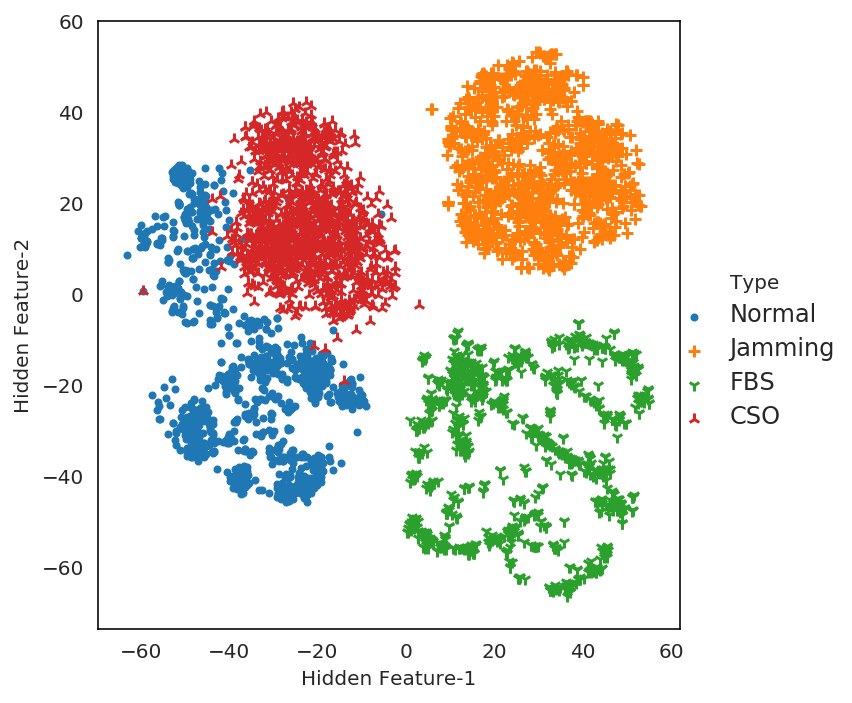

In [7]:
markers=['.', '+', '1', '2']
sns.set_style("white", {'axes.linewidth': 5, 'axes.edgecolor':'black'})
g = sns.lmplot(x='Hidden Feature-1', y='Hidden Feature-2', markers = markers, 
           data=stable_tsne, hue='Type', fit_reg=False, scatter_kws={'alpha':1})
sns.despine(top=False, right=False)
plt.setp(g._legend.get_texts(), fontsize=12)

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#set font size of labels on matplotlib plots
plt.rc('font', size=16)
plt.rcParams["figure.figsize"] = (5.5,5)
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
# sns.set_palette(customPalette)
# sns.palplot(customPalette)
customMarker = ['.', '+', '1', '2']
#number of points per group
n = 1200

#define group labels and their centers
groups = {'Normal': (2,2),
          'Jamming': (3,4),
          'FBS': (4,4),
          'CSO': (4,1)}

#define labels and where they should go
labels = {'Normal': (-35,-50),
          'Jamming': (30,56),
          'FBS': (10,-65),
          'CSO': (-25,45)}

#create labeled x and y data
data = df_sample
    
#create a new figure
plt.figure(figsize=(5.5,5))

#loop through labels and plot each cluster
for i, label in enumerate(groups.keys()):

    #add data points 
    plt.scatter(x=data.loc[data['Type']==label, 'RSS'], 
                y=data.loc[data['Type']==label,'corr'], 
#                 color=customPalette[i],
                marker=customMarker[i],
                alpha=1)
    
    #add label
    plt.annotate(label, 
                 labels[label],
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=16)
#                  size=16,
#                  color=customPalette[i]) 
plt.xlabel("RSS Auto-correlation")
plt.ylabel("RSS Raw (dB)")
plt.savefig('rss.eps', dpi=1200, format='eps')

# RSS

In [27]:
def read_rss(path):
    rss = []
    for file in glob.glob(path + '/*.txt'):
        with open(file, 'r') as f:
            for line in f:
                x = line.split()
                rss.append(float(x[0]))
    return np.array(rss).reshape(-1, 1)

In [28]:
cso_path = '/net/adv_spectrum/data/rss/downsample_10/abnormal/ryerson_ab_train_sigOver'
X_cso = read_rss(cso_path)

In [30]:
X_cso.shape

(3592922, 1)

In [9]:
normal_filename = 'ryerson_ab_train_normal_1000_rss.npy'
fbs_filename = 'ryerson_ab_train_LOS-5M-USRP1_abnormal_1000_rss.npy'
cso_filename = 'ryerson_ab_train_sigOver_abnormal_1000_rss.npy'
jamming_filename = '0208_anomaly_abnormal_1000_rss.npy'

path = '/net/adv_spectrum/array_data_rss/'
normal_path = path + normal_filename
fbs_path = path + fbs_filename
cso_path = path + cso_filename
jamming_path = path + jamming_filename

X_normal = np.load(normal_path).reshape(-1, 1)
print('Normal data is loaded.')
# print(np.shape(X_normal))
X_fbs = np.load(fbs_path).reshape(-1, 1)
print('FBS data is loaded.')
X_cso = np.load(cso_path).reshape(-1, 1)
print('CSO data is loaded.')
X_jamming = np.load(jamming_path).reshape(-1, 1)
print('Jamming data is loaded.')

Normal data is loaded.
FBS data is loaded.
CSO data is loaded.
Jamming data is loaded.


In [47]:
X = np.vstack((X_normal, X_jamming , X_fbs, X_cso))
y_normal = ['Normal']*(X_normal.shape[0])
y_fbs = ['FBS']*(X_fbs.shape[0])
y_cso = ['CSO']*(X_cso.shape[0])
y_jamming = ['Jamming']*(X_jamming.shape[0])
y = np.concatenate((y_normal, y_jamming, y_fbs, y_cso))

In [48]:
df_rss = pd.DataFrame(X, columns=['RSS'])
df_rss['Type'] = y

In [61]:
df_rss

RSS    Type
0        -39.335406  Normal
1        -39.358250  Normal
2        -38.674484  Normal
3        -39.343438  Normal
4        -38.885484  Normal
...             ...     ...
17044995 -39.032820     CSO
17044996 -40.093047     CSO
17044997 -40.015797     CSO
17044998 -39.284758     CSO
17044999 -38.185586     CSO

[17045000 rows x 2 columns]

Start plotting Normal
Start plotting Jamming
Start plotting FBS
Start plotting CSO


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


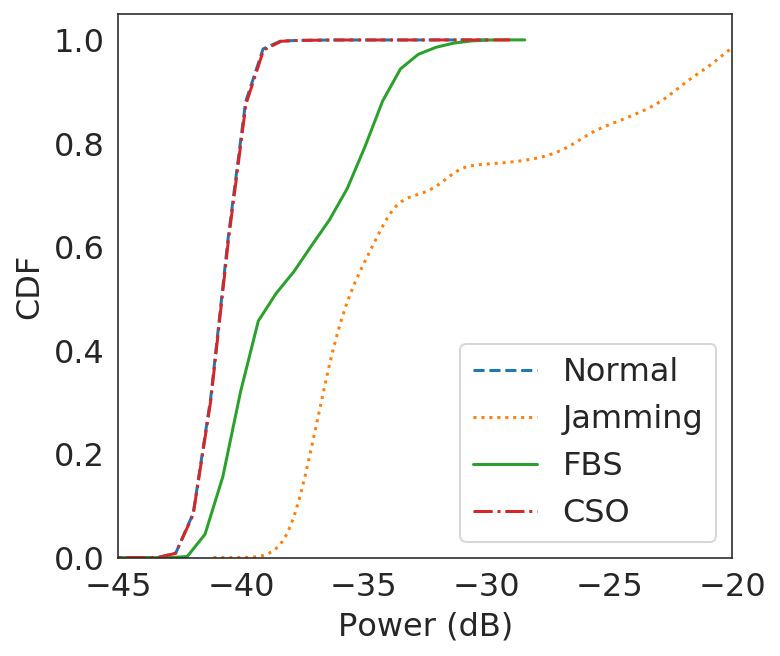

In [62]:
plt.rc('font', size=16)
plt.figure(figsize=(5.5,5))
groups = {'Normal': (2,2),
          'Jamming': (3,4),
          'FBS': (4,4),
          'CSO': (4,1)}
linestyles = ['--', ':', '-', '-.']
for i, label in enumerate(groups.keys()):
    print('Start plotting ' + label)
    sns.kdeplot(df_rss.loc[df_rss['Type']==label]['RSS'], 
                cumulative=True, shade=False, 
                linestyle=linestyles[i],
                label=label)
plt.xlabel("Power (dB)")
plt.ylabel("CDF")
plt.xlim(-45,-20)
plt.savefig('stable_cdf.eps', dpi=1200, format='eps')

# RSS raw vs RSS auto-correlation

In [80]:
df_rss.loc[df_rss['Type']=='FBS']

RSS Type
4097000  -39.035961  FBS
4097001  -36.873844  FBS
4097002  -38.746656  FBS
4097003  -37.839672  FBS
4097004  -36.785938  FBS
...             ...  ...
13456995 -34.387680  FBS
13456996 -34.221617  FBS
13456997 -34.085094  FBS
13456998 -35.310578  FBS
13456999 -34.291227  FBS

[9360000 rows x 2 columns]

In [10]:
from scipy.signal import correlate
from scipy.stats.stats import pearsonr
np.shape(X_fbs)

(9360000, 1)

In [11]:
np.shape(X_normal)

(3588000, 1)

In [12]:
np.shape(X_cso)

(3588000, 1)

In [13]:
np.shape(X_jamming)

(509000, 1)

In [42]:
window_size = 100
def corr_array(X_sig, sample_num, window_size):
    array = X_sig.reshape(-1)[:sample_num + 2*window_size]
    corrs = []
    for i in range(len(array) - 2*window_size):
        if np.shape(array[i:i+window_size])[0] != window_size & np.shape(array[i+window_size:i+window_size*2])[0] != window_size:
            break
        corrs.append(pearsonr(array[i:i+window_size], array[i+window_size:i+window_size*2])[0])
    print(np.shape(corrs))
    return corrs

normal_corrs = corr_array(X_normal, window_size)
fbs_corrs = corr_array(X_fbs, window_size)
cso_corrs = corr_array(X_cso, window_size)
jamming_corrs = corr_array(X_jamming, window_size)

(500000,)
(500000,)
(500000,)
(500000,)


In [43]:
X = np.concatenate((X_normal.reshape(-1)[:500000], X_jamming.reshape(-1)[:500000], 
              X_fbs.reshape(-1)[:500000], X_cso.reshape(-1)[:500000]))
X_corrs = np.concatenate((normal_corrs, jamming_corrs , fbs_corrs, cso_corrs))
y = np.concatenate((['Normal']*500000, ['FBS']*500000, ['CSO']*500000, ['Jamming']*500000))

df_rss_corr = pd.DataFrame(X, columns=['RSS'])
df_rss_corr['corr'] = X_corrs
df_rss_corr['Type'] = y

In [44]:
df_rss_corr

RSS      corr     Type
0       -39.335406  0.004987   Normal
1       -39.358250  0.031408   Normal
2       -38.674484  0.009412   Normal
3       -39.343438  0.011500   Normal
4       -38.885484  0.025838   Normal
...            ...       ...      ...
1999995 -39.647469  0.071225  Jamming
1999996 -40.079977  0.032736  Jamming
1999997 -39.891258  0.032564  Jamming
1999998 -40.071023  0.018877  Jamming
1999999 -40.394898  0.019196  Jamming

[2000000 rows x 3 columns]

In [45]:
1200 / 500000

0.0024

In [46]:
df_sample = df_rss_corr.sample(frac=0.0024, replace=True, random_state=1)

In [47]:
df_sample

RSS      corr     Type
128037  -39.248977 -0.086701   Normal
491755  -40.742750 -0.165924   Normal
470924  -40.243352 -0.253203   Normal
1840200 -40.223172 -0.070560  Jamming
491263  -39.793656 -0.179643   Normal
...            ...       ...      ...
824408  -37.548836 -0.074544      FBS
660392  -35.199539 -0.232007      FBS
92537   -39.379359 -0.137134   Normal
892806  -21.383344  0.038926      FBS
460460  -41.449375 -0.004772   Normal

[4800 rows x 3 columns]

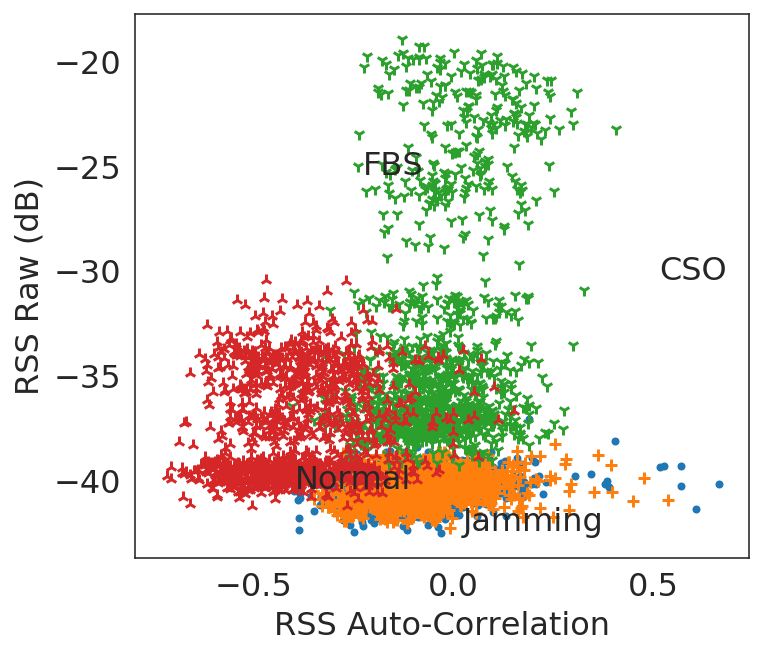

In [48]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#set font size of labels on matplotlib plots
plt.rc('font', size=16)
plt.rcParams["figure.figsize"] = (5.5,5)
#set style of plots
sns.set_style('white')

#define a custom palette
# customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
# sns.set_palette(customPalette)
# sns.palplot(customPalette)
customMarker = ['.', '+', '1', '2']
#number of points per group
n = 1200

#define group labels and their centers
groups = {'Normal': (2,2),
          'Jamming': (3,4),
          'FBS': (4,4),
          'CSO': (4,1)}

#define labels and where they should go
labels = {'Normal': (-0.25,-40),
          'Jamming': (0.2,-42),
          'FBS': (-0.15,-25),
          'CSO': (0.6,-30)}

#create labeled x and y data
data = df_sample
    
#create a new figure
plt.figure(figsize=(5.5,5))

#loop through labels and plot each cluster
for i, label in enumerate(groups.keys()):

    #add data points 
    plt.scatter(x=data.loc[data['Type']==label, 'corr'], 
                y=data.loc[data['Type']==label, 'RSS'], 
#                 color=customPalette[i],
                marker=customMarker[i],
                alpha=1)
    
    #add label
    plt.annotate(label, 
                 labels[label],
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=16)
#                  size=16,
#                  color=customPalette[i]) 
plt.xlabel("RSS Auto-Correlation")
plt.ylabel("RSS Raw (dB)")
plt.show()
# plt.savefig('stable_rss.eps', bbox_inches = 'tight', format='eps')

Text(0.5, 1, 'Auto-Corr Step = 100')

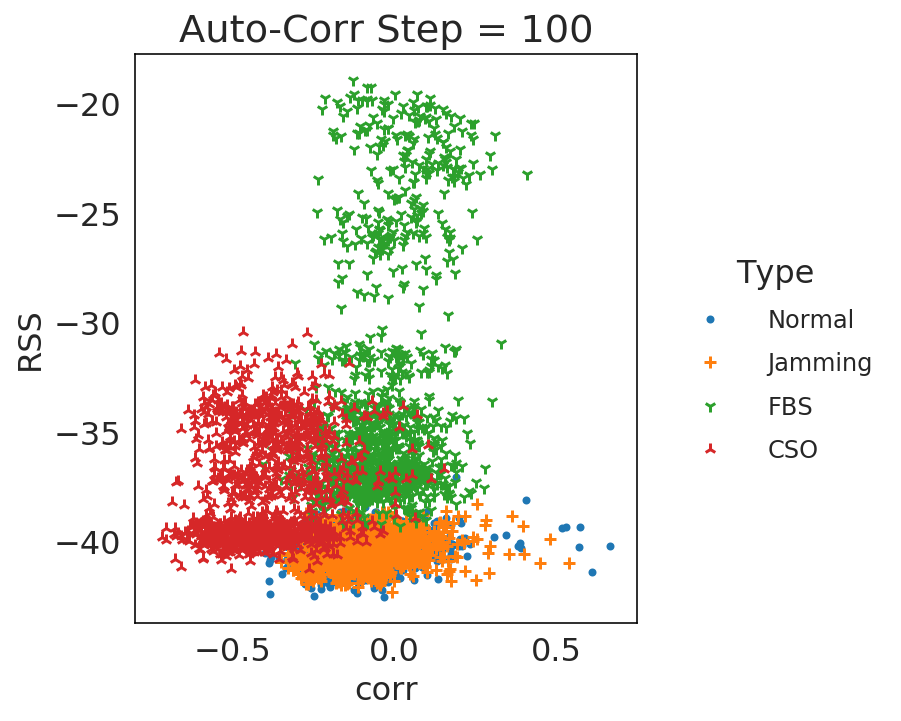

In [51]:
markers=['.', '+', '1', '2']
sns.set_style("white", {'axes.linewidth': 5, 'axes.edgecolor':'black'})
g = sns.lmplot(x='corr', y='RSS', markers = markers, 
           data=df_sample, hue='Type', fit_reg=False, scatter_kws={'alpha':1})
sns.despine(top=False, right=False)
plt.setp(g._legend.get_texts(), fontsize=12)
plt.title('Auto-Corr Step = 100')

In [55]:
def avg_rss(X_sig, sample_num, window_size):
    array = X_sig.reshape(-1)[:sample_num + 2*window_size]
    means = []
    for i in range(len(array) - 2*window_size):
        if np.shape(array[i:i+window_size])[0] != window_size & np.shape(array[i+window_size:i+window_size*2])[0] != window_size:
            break
        means.append(np.mean(array[i:i+window_size]))
    print(np.shape(means))
    return means

normal_means = avg_rss(X_normal, sample_num, window_size)

(500000,)


In [60]:
def avg_rss(X_sig, sample_num, window_size):
    array = X_sig.reshape(-1)[:sample_num + 2*window_size]
    means = []
    for i in range(len(array) - 2*window_size):
        if np.shape(array[i:i+window_size])[0] != window_size & np.shape(array[i+window_size:i+window_size*2])[0] != window_size:
            break
        means.append(np.mean(array[i:i+window_size]))
#     print(np.shape(means))
    return means


def corr_array(X_sig, sample_num, window_size):
    array = X_sig.reshape(-1)[:sample_num + 2*window_size]
    corrs = []
    for i in range(len(array) - 2*window_size):
        if np.shape(array[i:i+window_size])[0] != window_size & np.shape(array[i+window_size:i+window_size*2])[0] != window_size:
            break
        corrs.append(pearsonr(array[i:i+window_size], array[i+window_size:i+window_size*2])[0])
#     print(np.shape(corrs))
    return corrs


def plot_2d_rss(sample_num, window_size):
    normal_corrs = corr_array(X_normal, sample_num, window_size)
    fbs_corrs = corr_array(X_fbs, sample_num, window_size)
    cso_corrs = corr_array(X_cso, sample_num, window_size)
    jamming_corrs = corr_array(X_jamming, sample_num, window_size)

    normal_means = avg_rss(X_normal, sample_num, window_size)
    fbs_means = avg_rss(X_fbs, sample_num, window_size)
    cso_means = avg_rss(X_cso, sample_num, window_size)
    jamming_means = avg_rss(X_jamming, sample_num, window_size)

    X = np.concatenate((normal_means, jamming_means, fbs_means, cso_means))
    X_corrs = np.concatenate((normal_corrs, jamming_corrs , fbs_corrs, cso_corrs))
    y = np.concatenate((['Normal']*sample_num, ['FBS']*sample_num, 
                        ['CSO']*sample_num, ['Jamming']*sample_num))

    df_rss_corr = pd.DataFrame(X, columns=['RSS'])
    df_rss_corr['corr'] = X_corrs
    df_rss_corr['Type'] = y

    portion = 1200 / sample_num 

    df_sample = df_rss_corr.sample(frac=portion, replace=True, random_state=1)
    markers=['.', '+', '1', '2']
    sns.set_style("white", {'axes.linewidth': 5, 'axes.edgecolor':'black'})
    g = sns.lmplot(x='corr', y='RSS', markers = markers, 
               data=df_sample, hue='Type', fit_reg=False, scatter_kws={'alpha':1})
    sns.despine(top=False, right=False)
    plt.setp(g._legend.get_texts(), fontsize=12)
    plt.title('Auto-Corr Step = '+ str(window_size))
    plt.show()

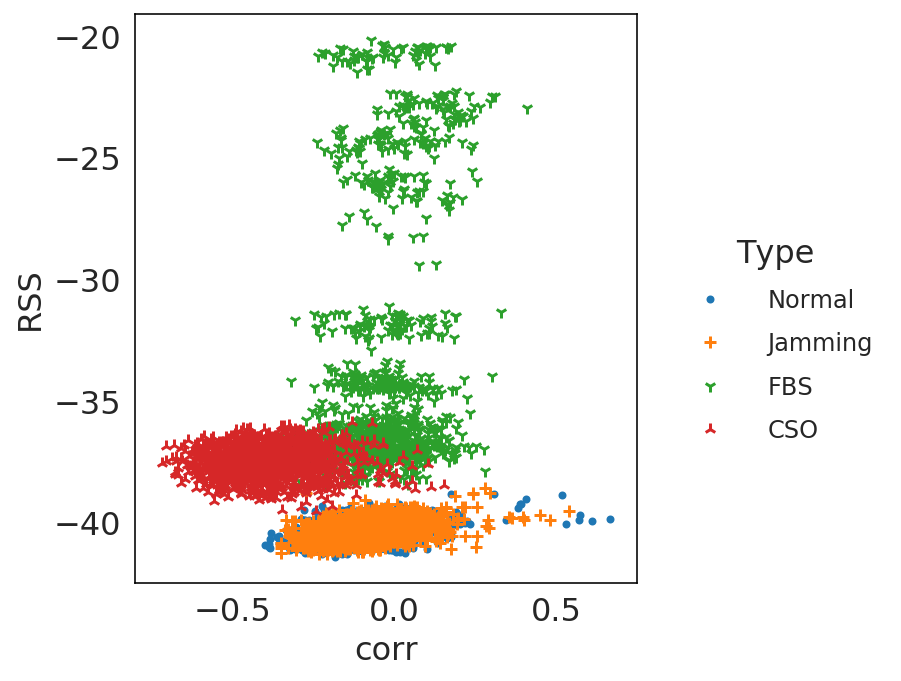

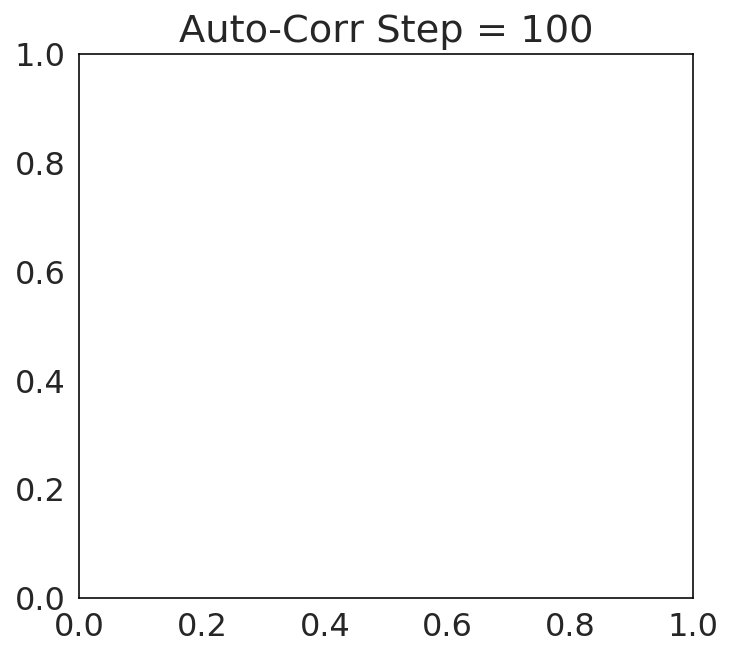

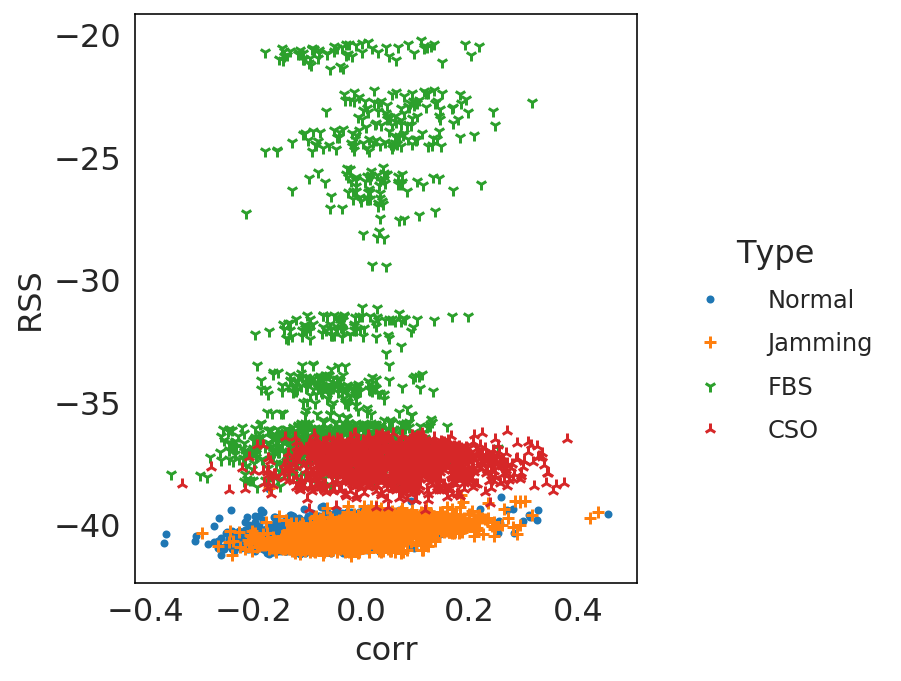

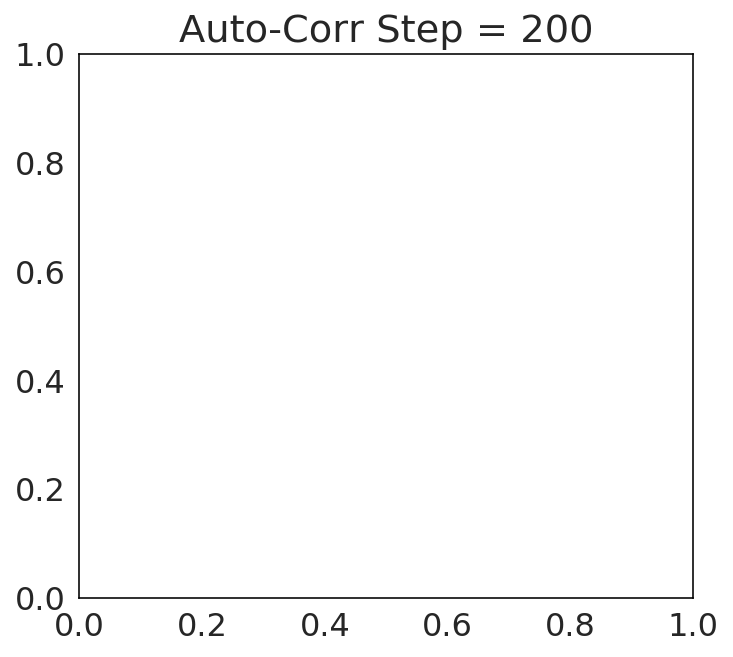

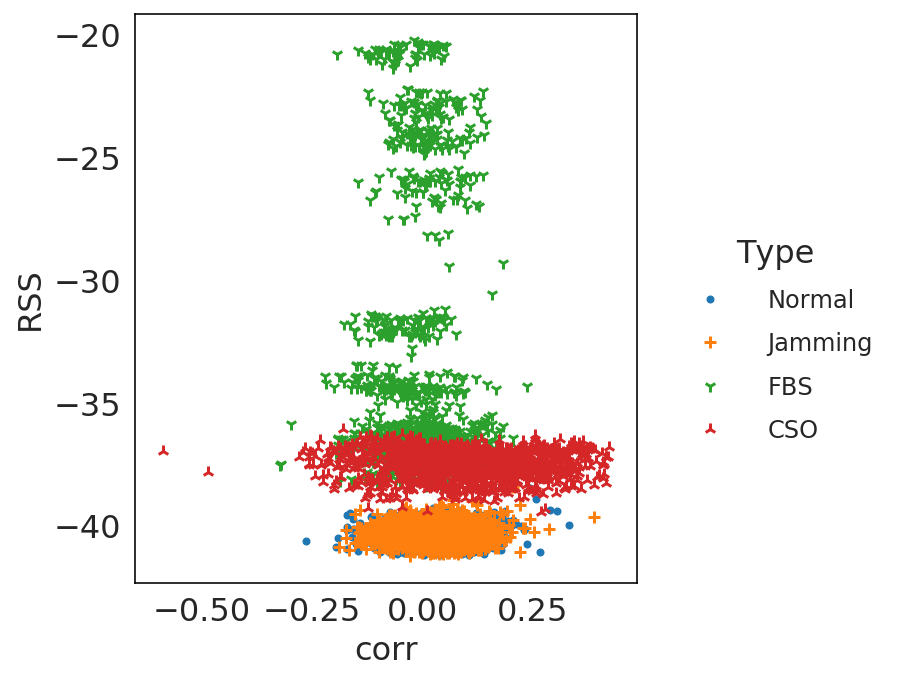

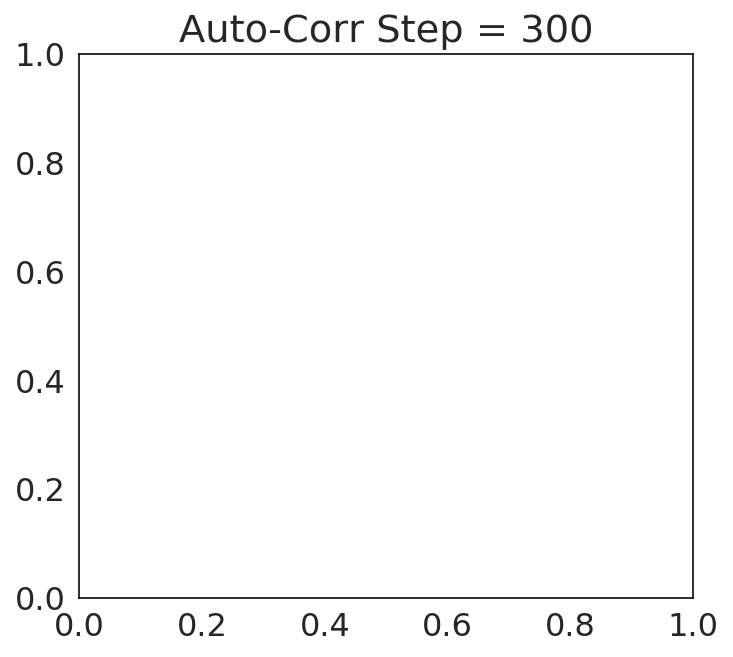

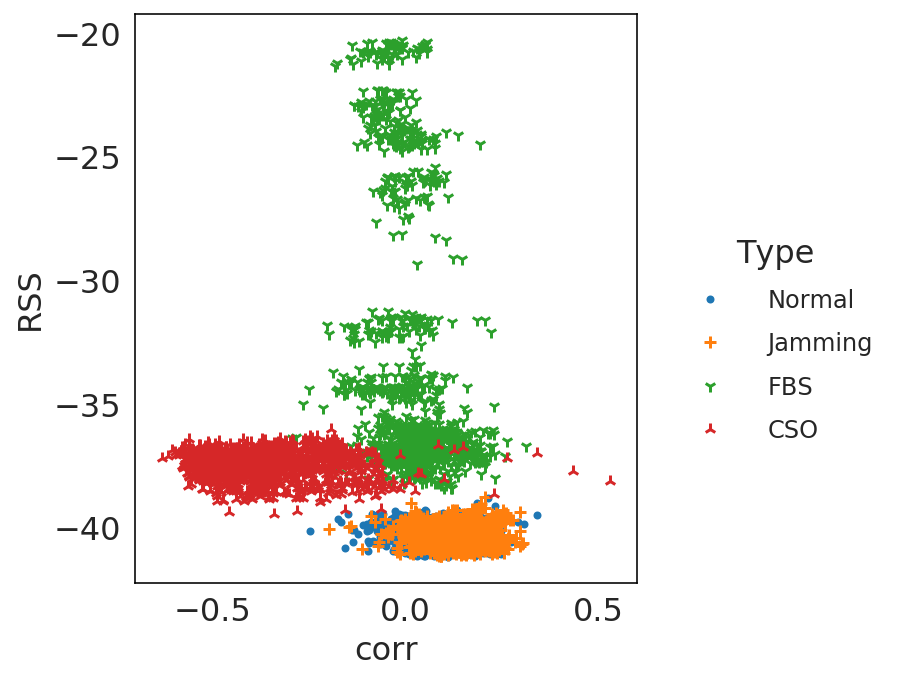

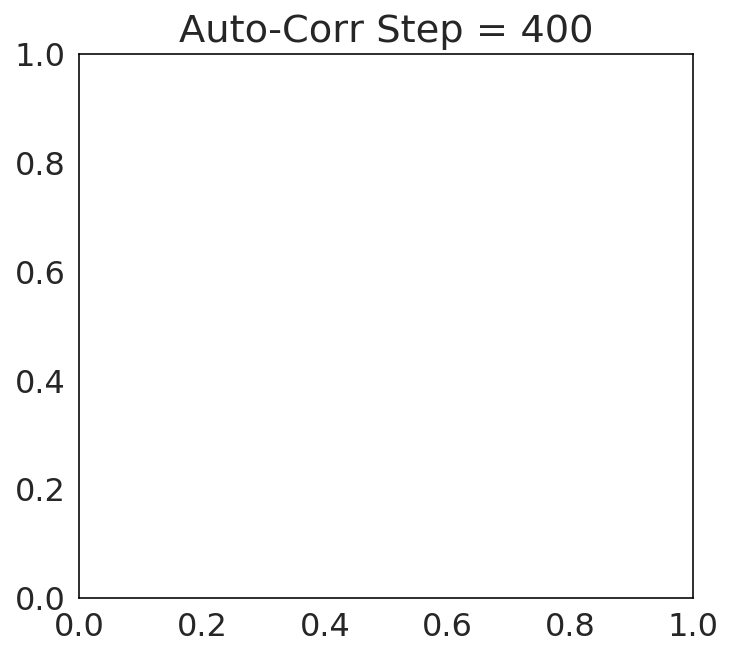

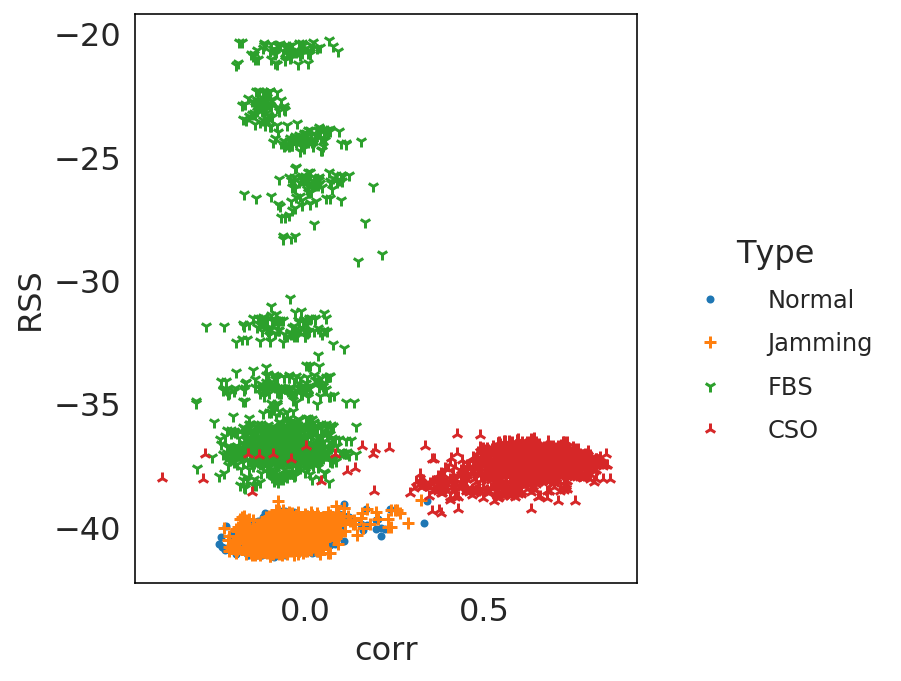

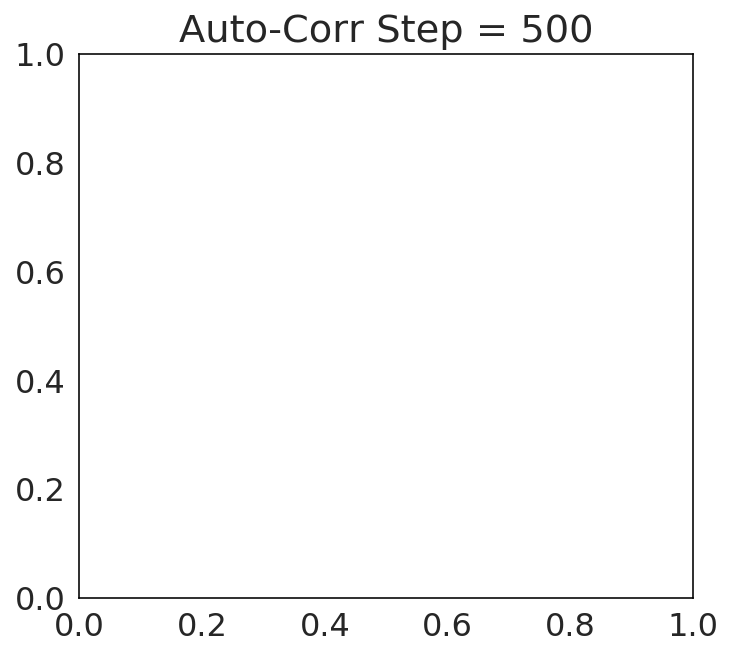

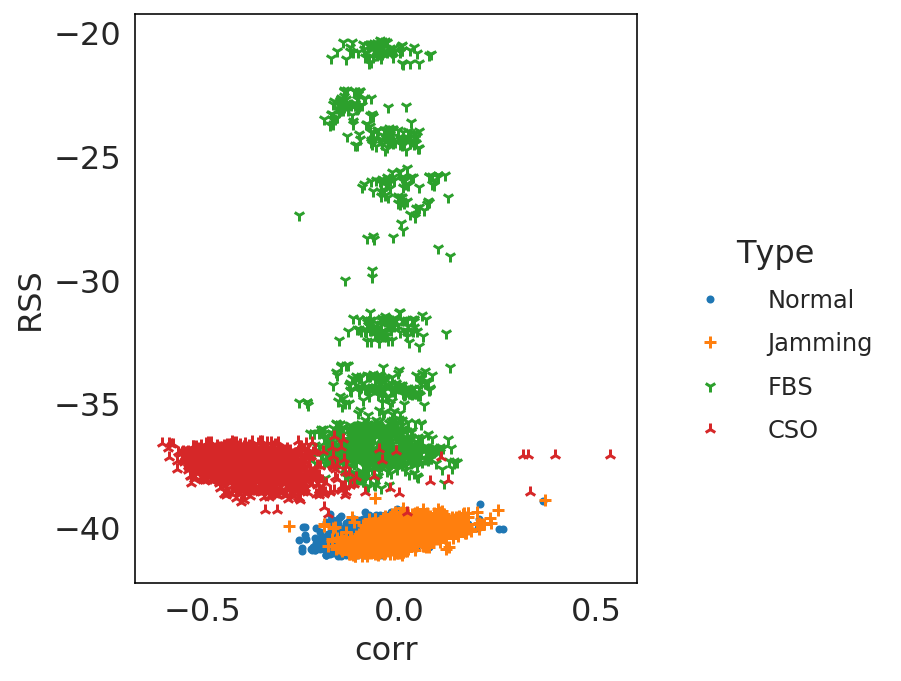

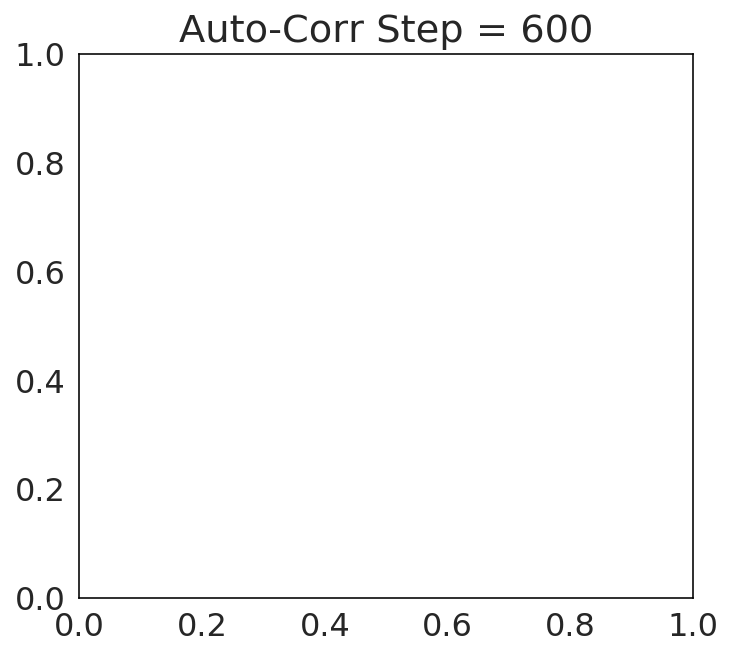

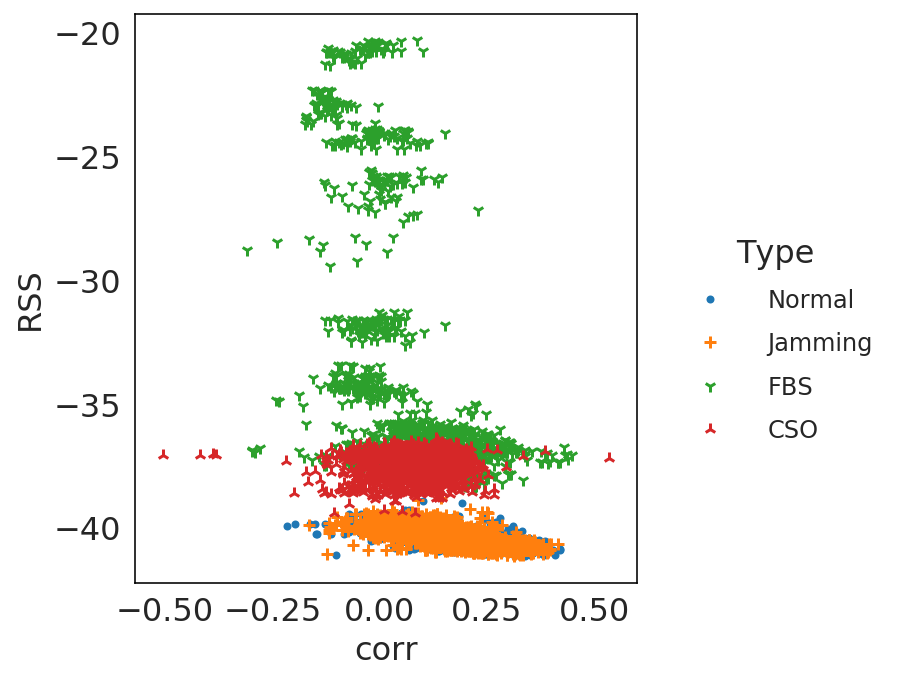

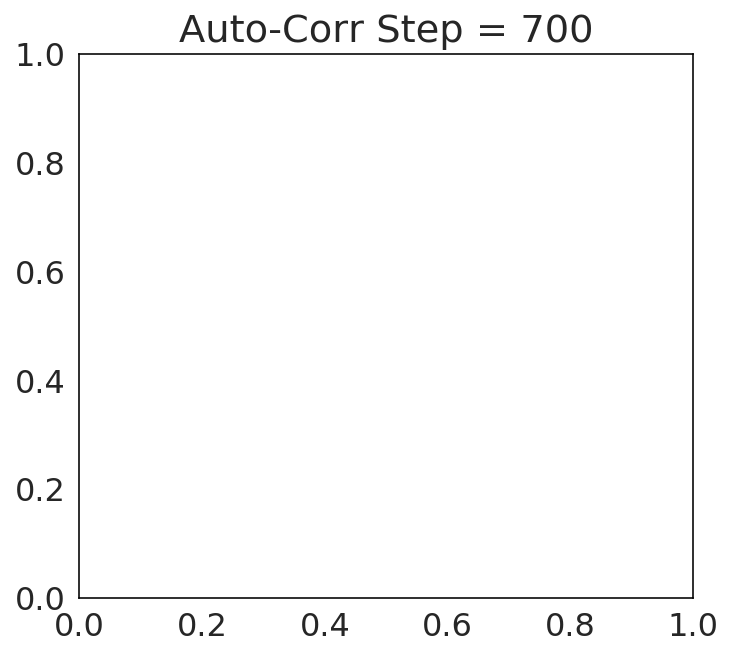

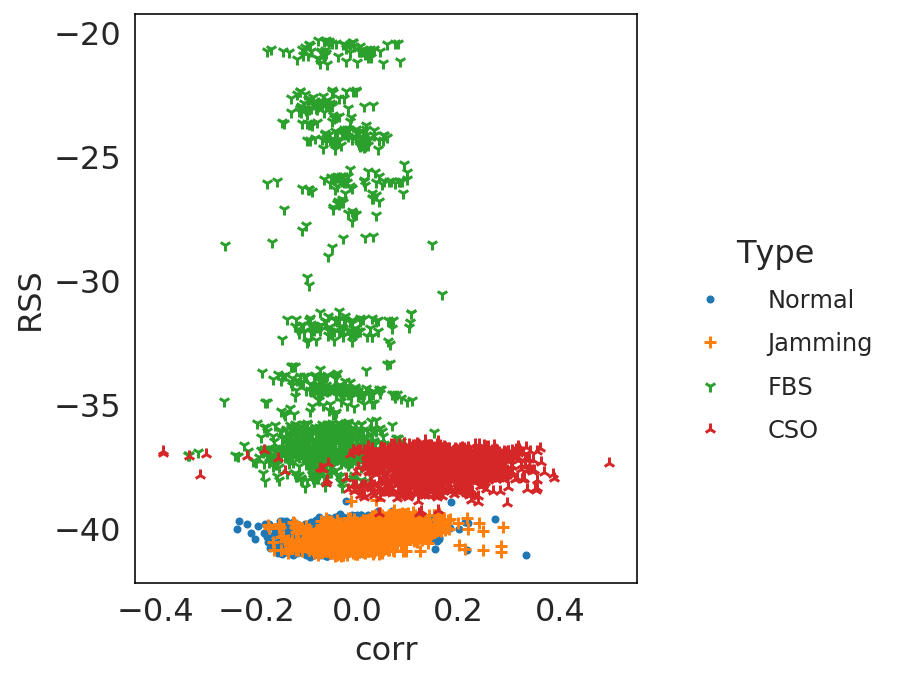

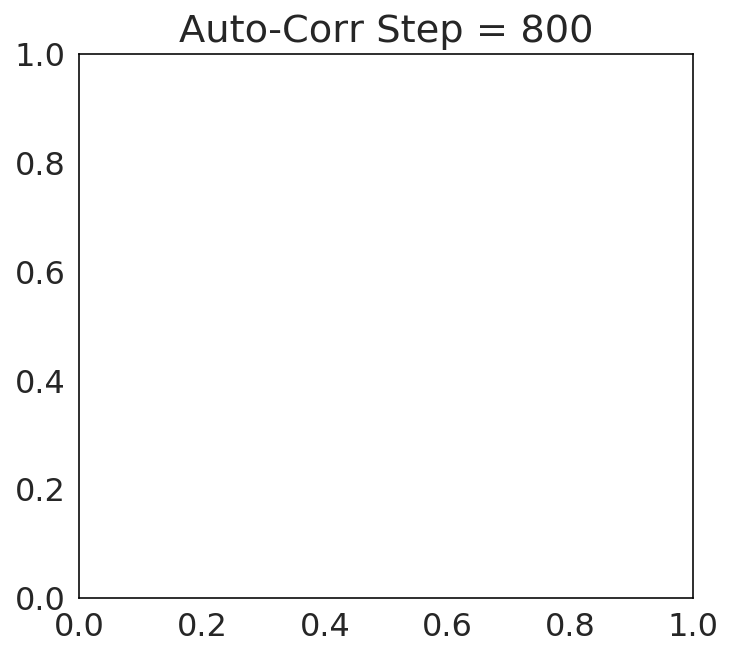

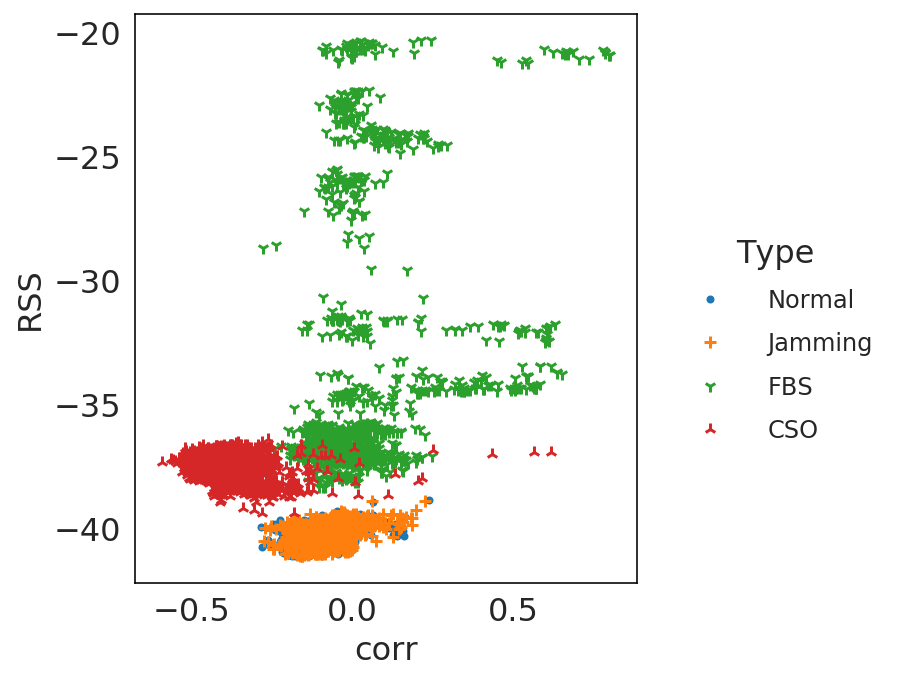

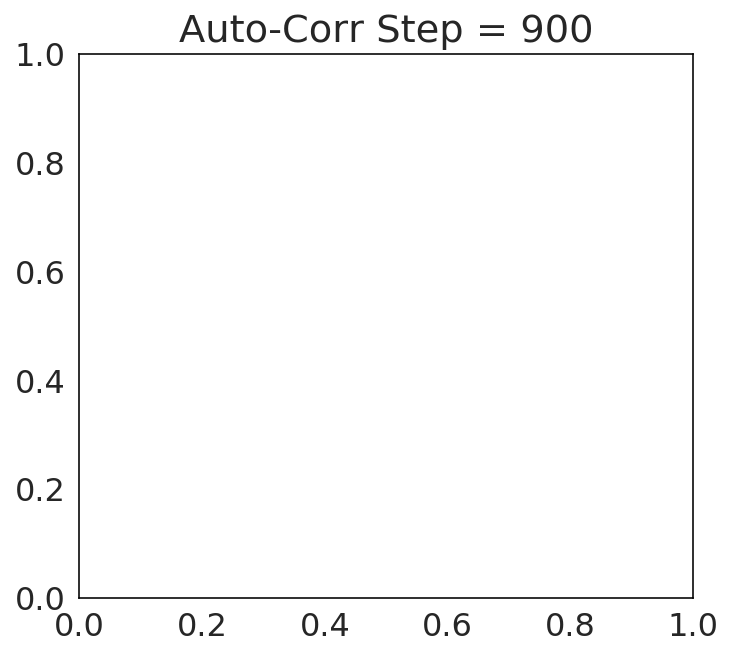

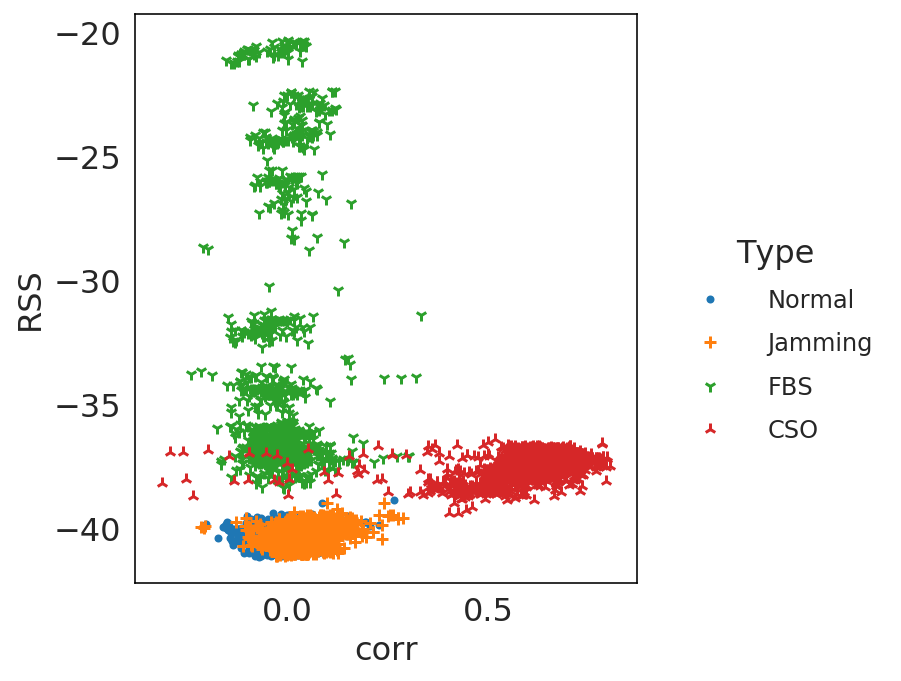

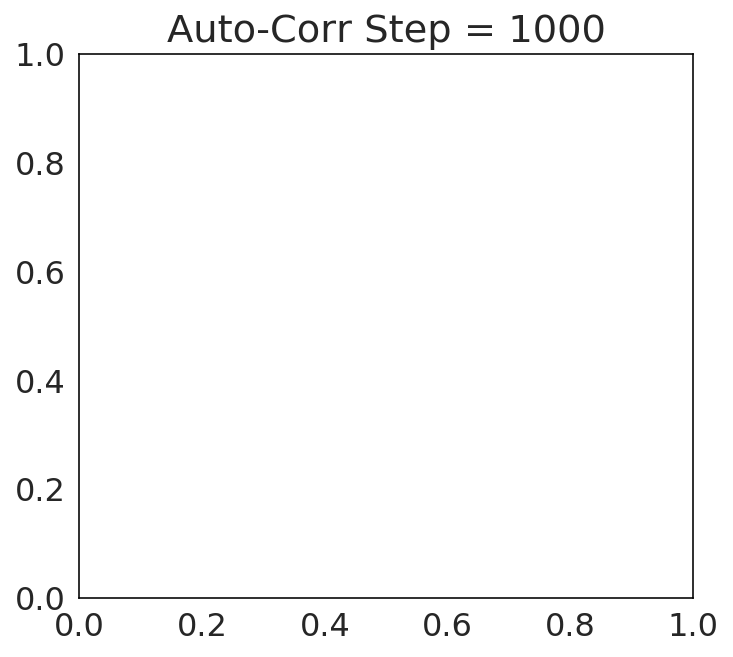

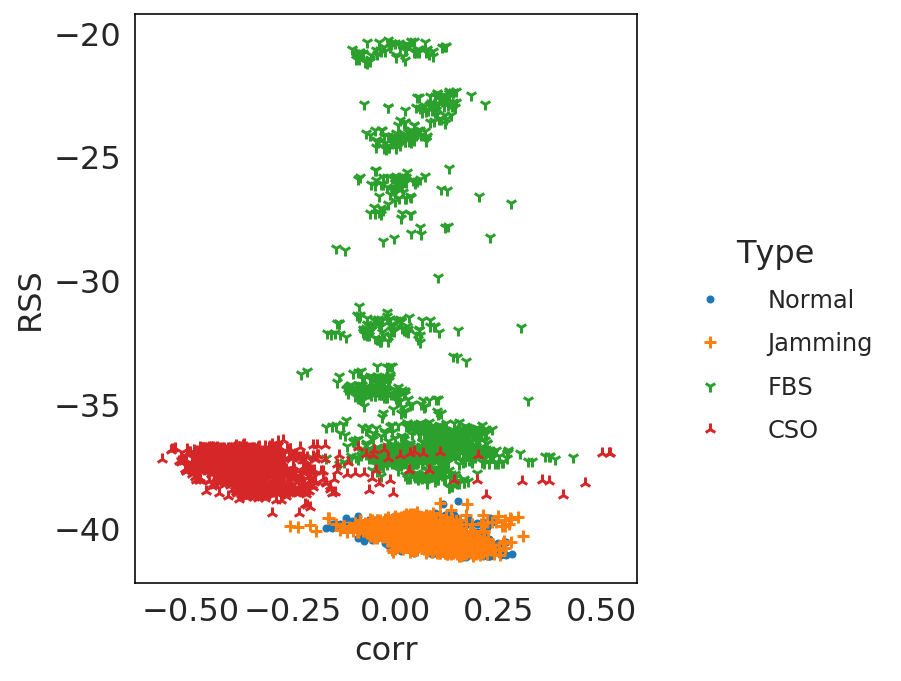

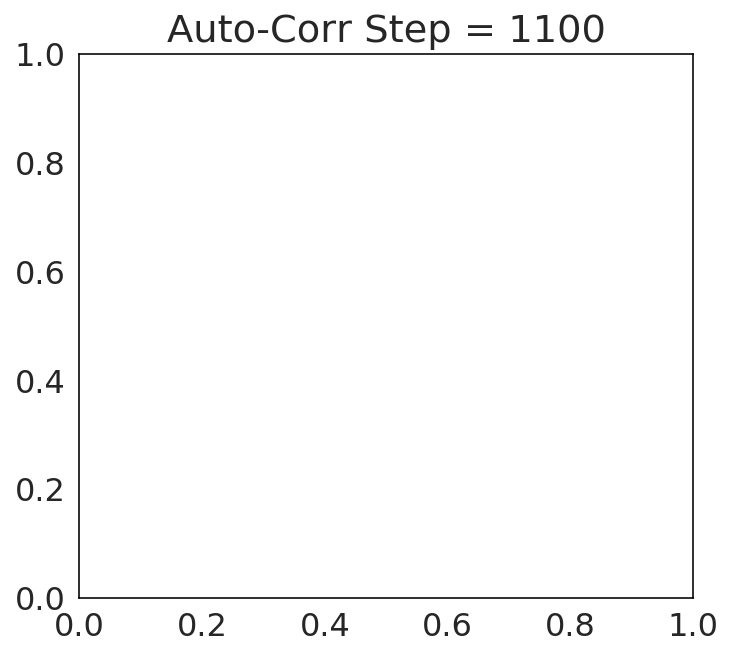

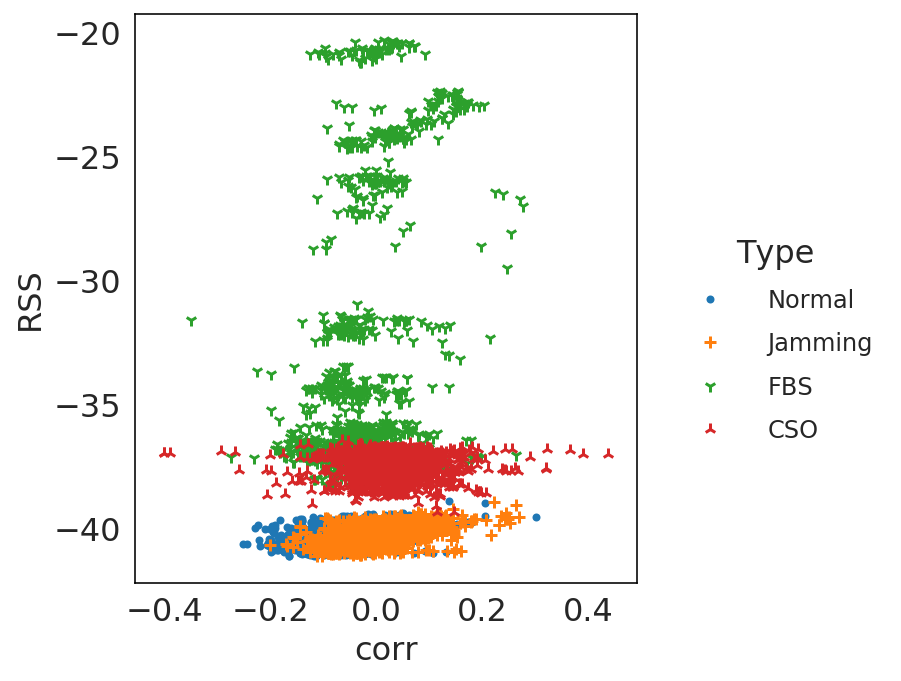

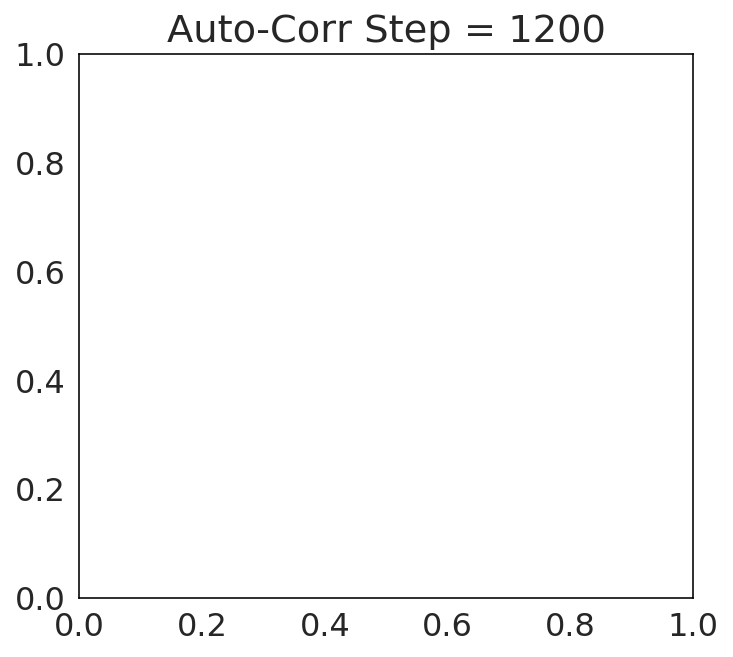

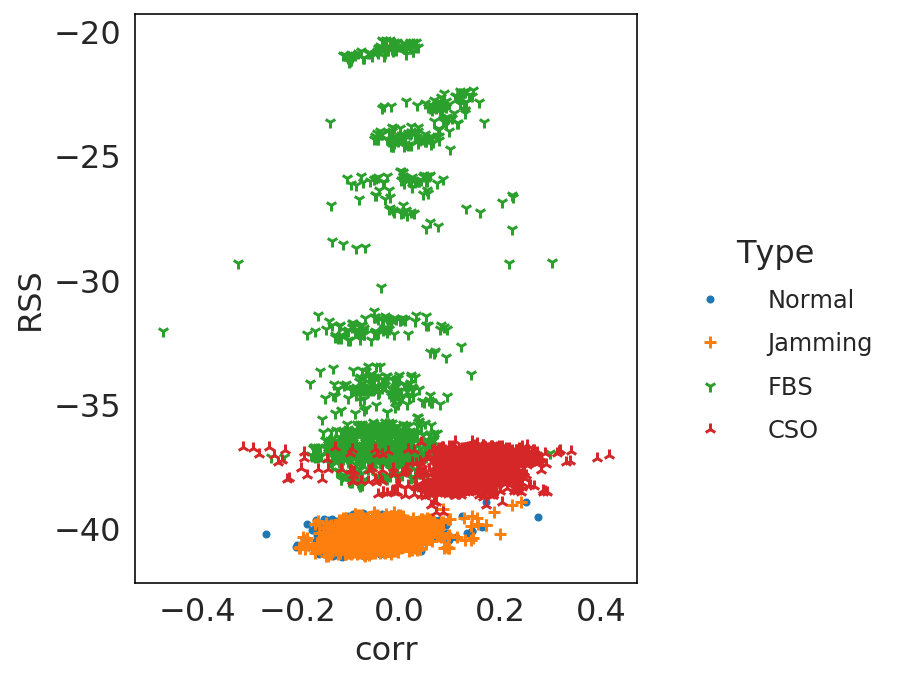

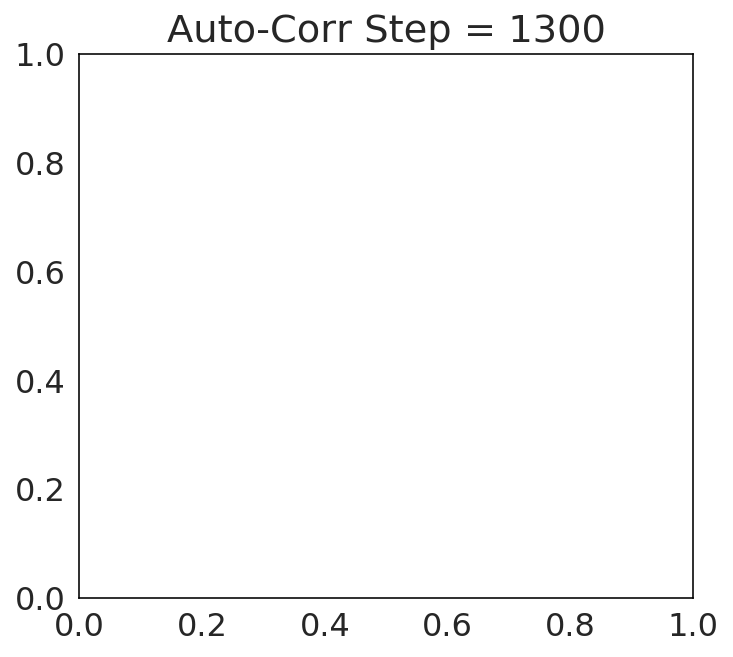

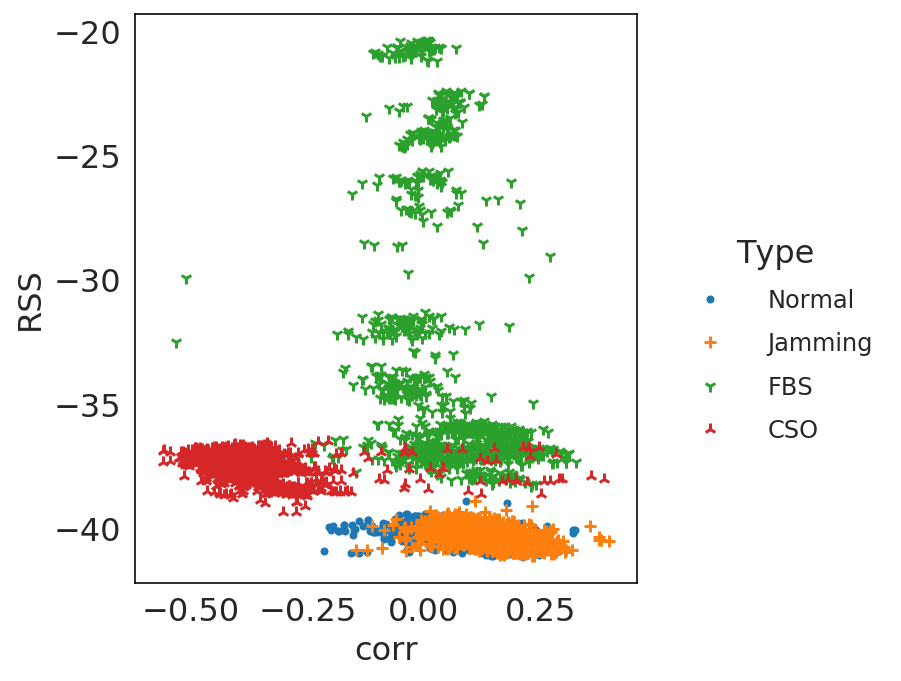

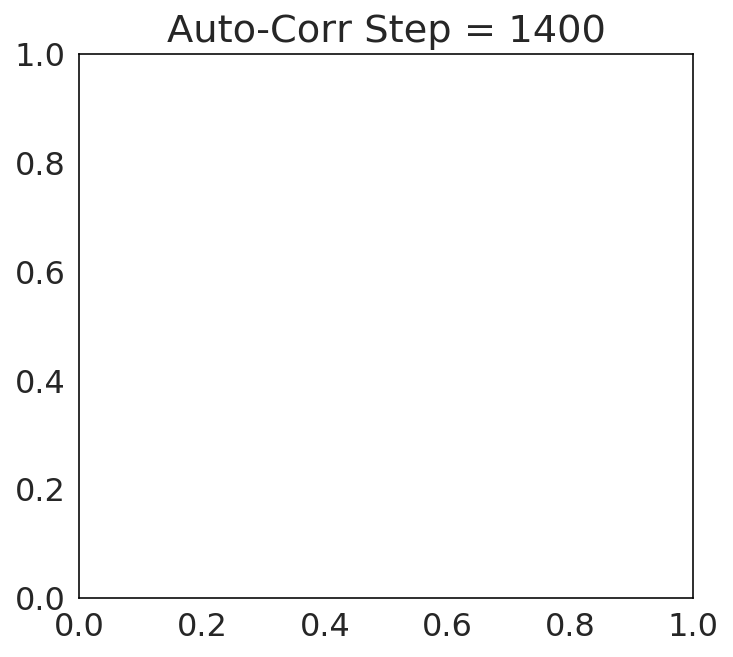

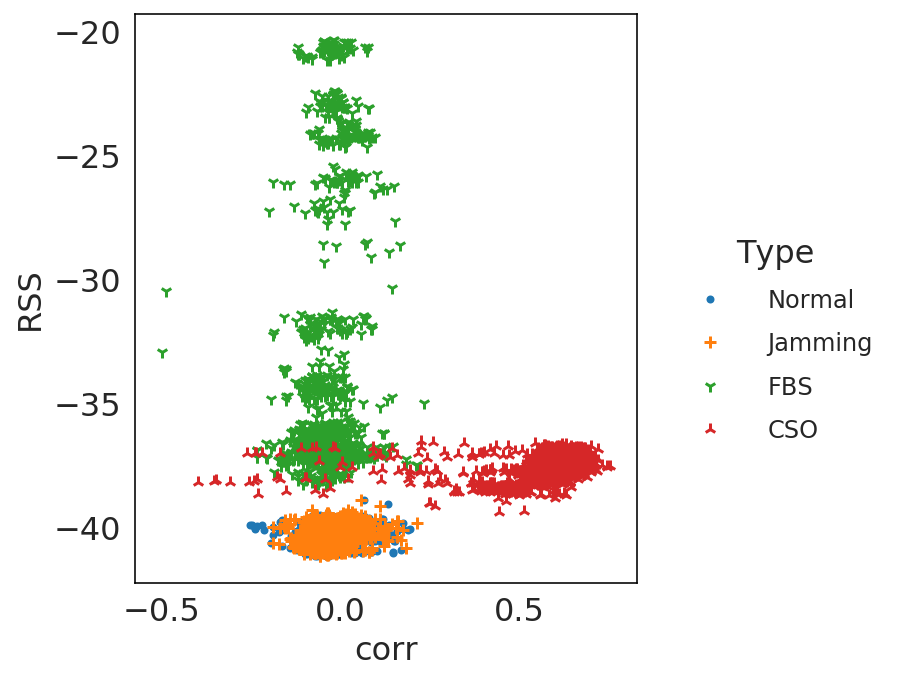

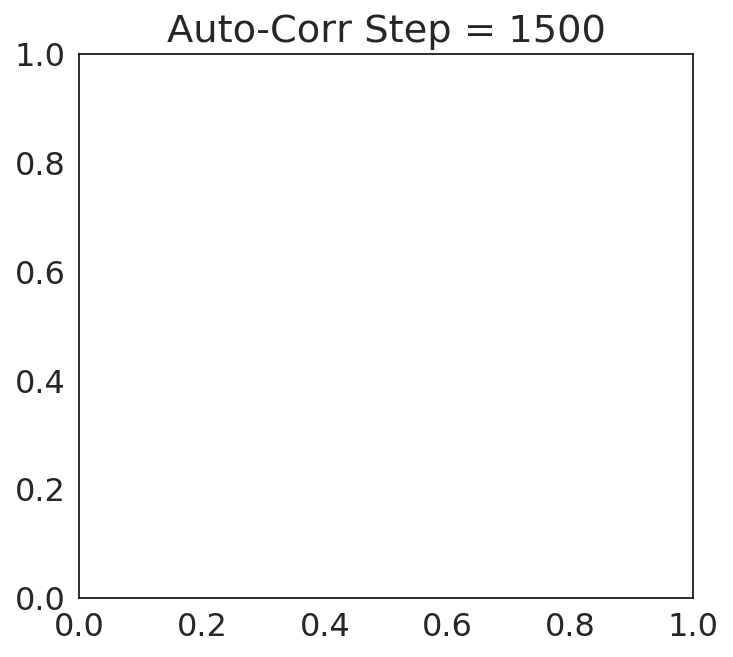

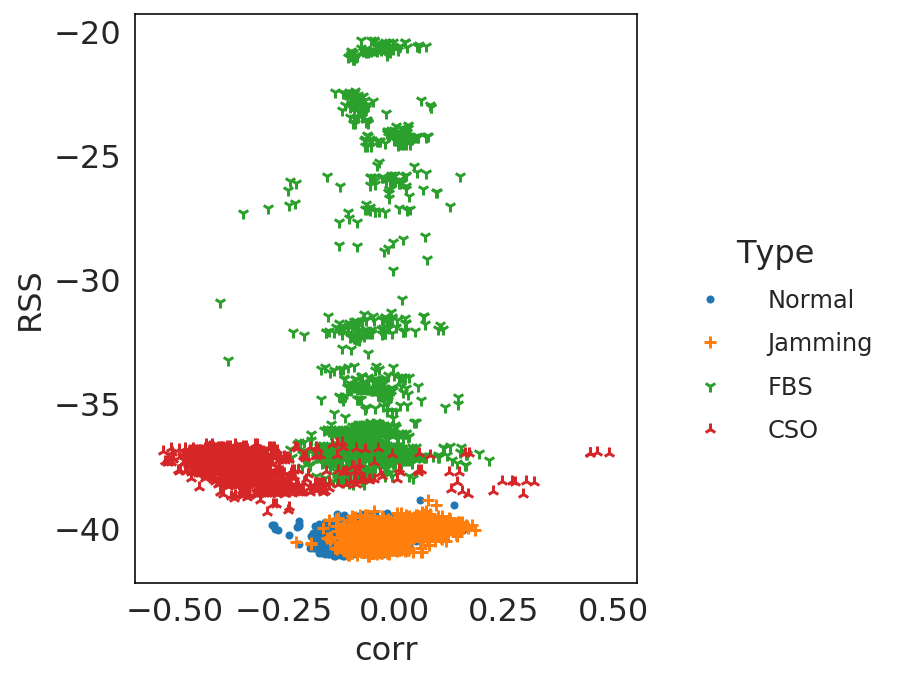

KeyboardInterrupt: 

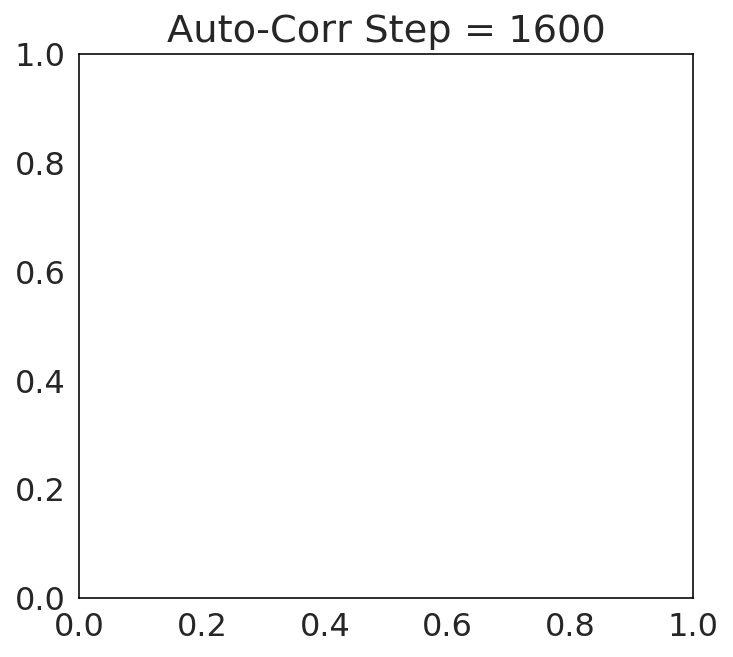

In [62]:
sample_num = 500000
for i in range(100, 2001, 100):
    plot_2d_rss(sample_num, i)

In [76]:
def plot_2d_rss(sample_num, window_size):
    normal_corrs = corr_array(X_normal, sample_num, window_size)
    fbs_corrs = corr_array(X_fbs, sample_num, window_size)
    cso_corrs = corr_array(X_cso, sample_num, window_size)
    jamming_corrs = corr_array(X_jamming, 500000, window_size)

    normal_means = avg_rss(X_normal, sample_num, window_size)
    fbs_means = avg_rss(X_fbs, sample_num, window_size)
    cso_means = avg_rss(X_cso, sample_num, window_size)
    jamming_means = avg_rss(X_jamming, 500000, window_size)

    X = np.concatenate((normal_means, jamming_means, fbs_means, cso_means))
    X_corrs = np.concatenate((normal_corrs, jamming_corrs , fbs_corrs, cso_corrs))
    y = np.concatenate((['Normal']*np.shape(normal_means)[0], ['FBS']*np.shape(jamming_means)[0], 
                        ['CSO']*np.shape(fbs_means)[0], ['Jamming']*np.shape(cso_means)[0]))

    print(np.shape(X), np.shape(X_corrs), np.shape(y))
    df_rss_corr = pd.DataFrame(X, columns=['RSS'])
    df_rss_corr['corr'] = X_corrs
    df_rss_corr['Type'] = y

    portion = 1200 / 1200#sample_num 

    df_sample = df_rss_corr.sample(frac=portion, replace=True, random_state=1)
    markers=['.', '+', '1', '2']
    sns.set_style("white", {'axes.linewidth': 5, 'axes.edgecolor':'black'})
    g = sns.lmplot(x='corr', y='RSS', markers = markers, 
               data=df_sample, hue='Type', fit_reg=False, scatter_kws={'alpha':0.01})
    sns.despine(top=False, right=False)
    plt.setp(g._legend.get_texts(), fontsize=12)
    plt.title('Auto-Corr Step = '+ str(window_size))
    
    return df_rss_corr

(17030000,) (17030000,) (17030000,)


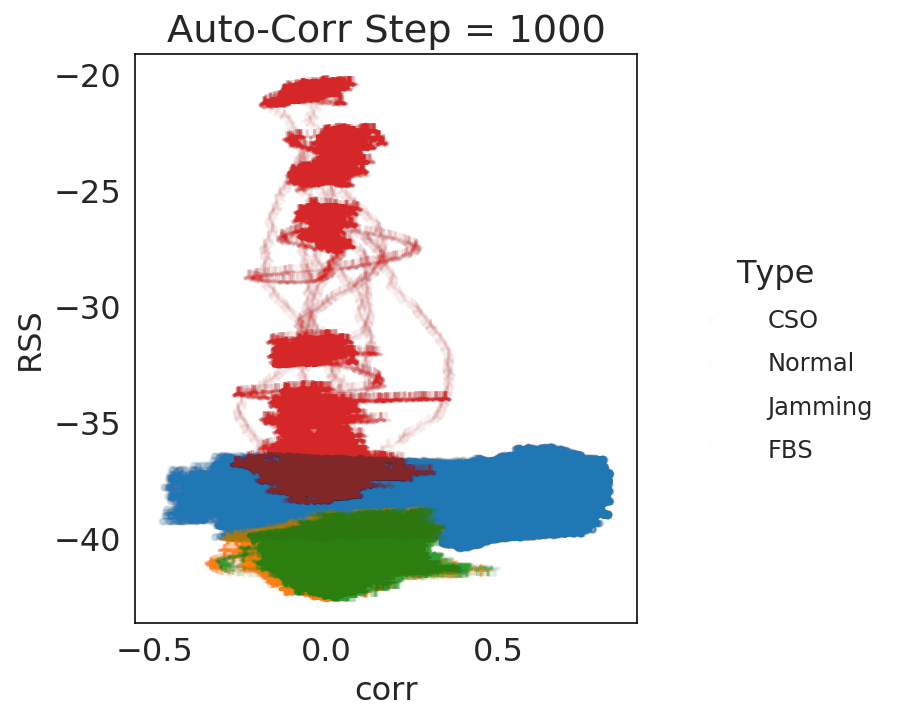

In [77]:
df_rss_corr = plot_2d_rss(30000000, 1000)

In [75]:
(17030000 - 500000) /3

5510000.0

In [78]:
df_rss_corr

RSS      corr     Type
0        -39.898501 -0.056026   Normal
1        -39.899124 -0.055658   Normal
2        -39.900183 -0.052681   Normal
3        -39.900802 -0.053313   Normal
4        -39.901517 -0.052131   Normal
...             ...       ...      ...
17029995 -40.598772  0.046645  Jamming
17029996 -40.598559  0.047330  Jamming
17029997 -40.597387  0.047398  Jamming
17029998 -40.597138  0.045705  Jamming
17029999 -40.595680  0.046838  Jamming

[17030000 rows x 3 columns]

Text(0.5, 1, 'Auto-Corr Step = 1000')

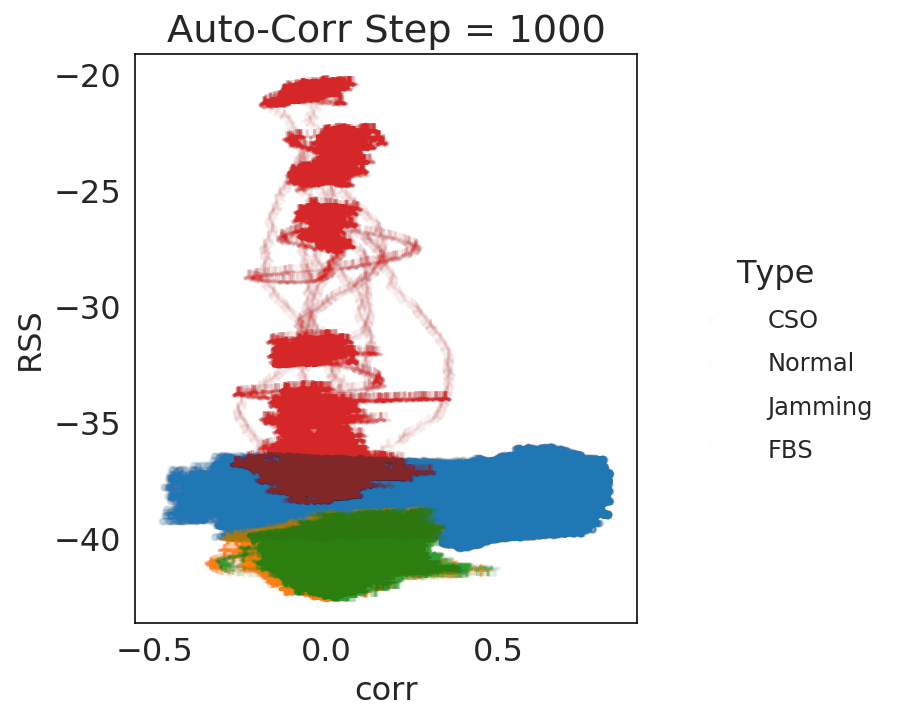

In [80]:
portion=1
df_sample = df_rss_corr.sample(frac=portion, replace=True, random_state=1)
markers=['.', '+', '1', '2']
sns.set_style("white", {'axes.linewidth': 5, 'axes.edgecolor':'black'})
g = sns.lmplot(x='corr', y='RSS', markers = markers, 
           data=df_sample, hue='Type', fit_reg=False, scatter_kws={'alpha':0.01})
sns.despine(top=False, right=False)
plt.setp(g._legend.get_texts(), fontsize=12)
plt.title('Auto-Corr Step = 1000')

Start plotting Normal
Start plotting Jamming
Start plotting FBS
Start plotting CSO


Text(0, 0.5, 'CDF')

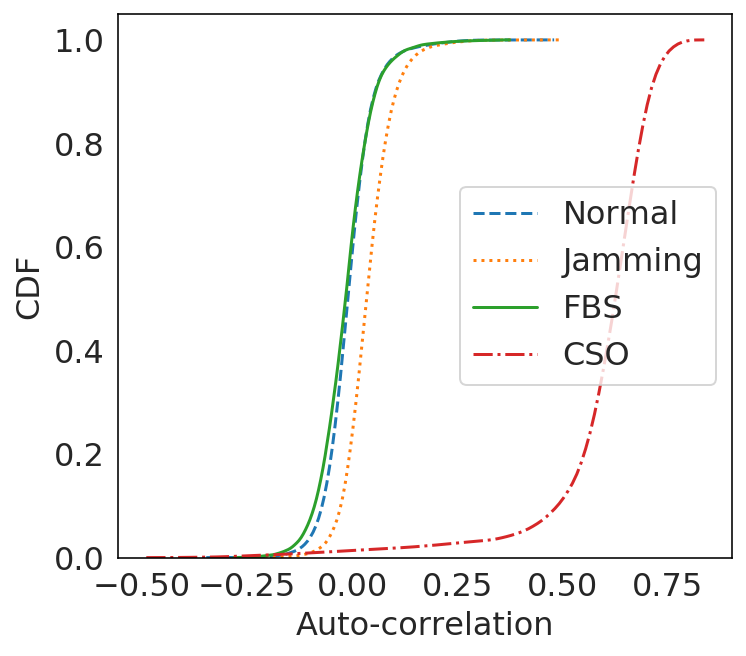

In [82]:
plt.rc('font', size=16)
plt.figure(figsize=(5.5,5))
groups = {'Normal': (2,2),
          'Jamming': (3,4),
          'FBS': (4,4),
          'CSO': (4,1)}
linestyles = ['--', ':', '-', '-.']
for i, label in enumerate(groups.keys()):
    print('Start plotting ' + label)
    sns.kdeplot(df_rss_corr.loc[df_rss_corr['Type']==label]['corr'], 
                cumulative=True, shade=False, 
                linestyle=linestyles[i],
                label=label)
plt.xlabel("Auto-correlation")
plt.ylabel("CDF")
# plt.savefig('stable_cdf.eps', dpi=1200, format='eps')

In [83]:
1000 / 40

25.0

# Test what's wrong in the code?

- Why sigover power is higher? 
- Why the auto-correlation is higher?
- How about mobile observers?

1. Data

    []From the same source
    
    []Eyeball the source (SigOver)

2. Code 
    []sigover generation
    
    []Rss generation
    
    []Correlation computation

In [1]:

def plot_single_spec(filename, title):
    time_step = 1000
    Slen = 128
#     image_num = 5
    time_duration = 10 # one image is about 1s, so # of images = time duration (s)
    start_point = 12800
    line_count = 0

    fid = open(filename + '.txt','r')
#     if not os.path.exists('single_plot/' + filename + '/'):
#             os.makedirs('single_plot/' + filename + '/')

    for i in range(0,start_point):
            fid.readline()
    for time in range(0,time_duration):
            fig_name = 'single_plot/' + filename + '/' + str(time+2) + '00ms.png'
#             fig,axes = plt.subplots(nrows=image_num,ncols=1,sharex=True,sharey=True)
            fig = plt.figure()
            plt.yticks([0,64,128],['0','2.5M','5M'])
            plt.xticks([0,200,400,600,800,1000], [0,51.2,102.4,153.6,204.8,256],size=14)

#             for index in range(0,image_num):
            data = []
            for i in range(0,time_step):
                    line = fid.readline()
                    line_count += 1
                    amplitude = line.split()
                    current_data = [float(i) for i in amplitude]
                    data += current_data

            data_array = np.array(data).reshape((time_step,Slen)).T
            im = plt.imshow(data_array,cmap='jet',vmin=-70,vmax=-20,aspect='auto')
            
            fig.colorbar(im)
            fig.suptitle(title,size=14)
            plt.xlabel('time(ms)')
            plt.ylabel('frequency bins')
#             fig.savefig(fig_name, dpi=1200)
            plt.show()
            plt.close(fig)

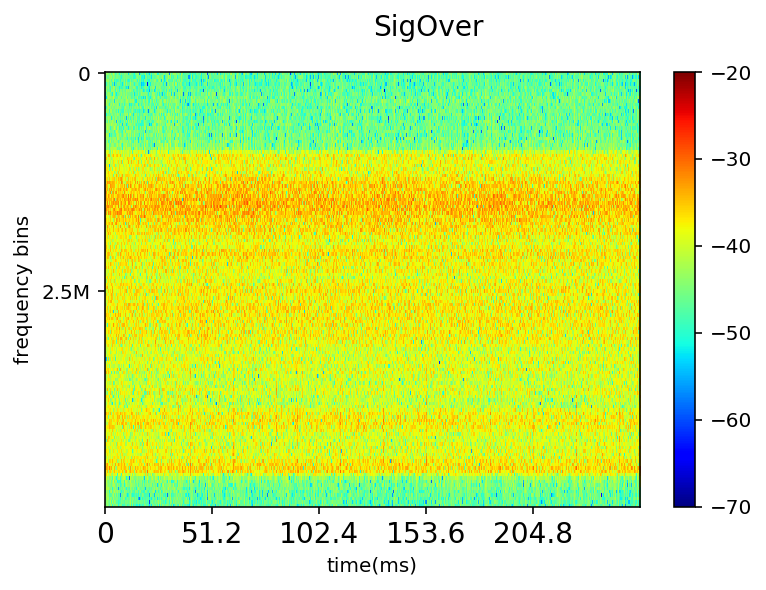

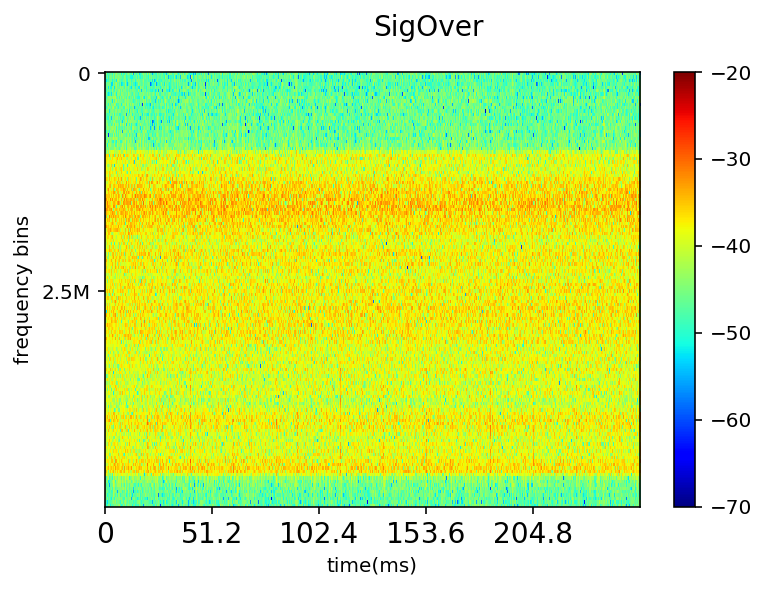

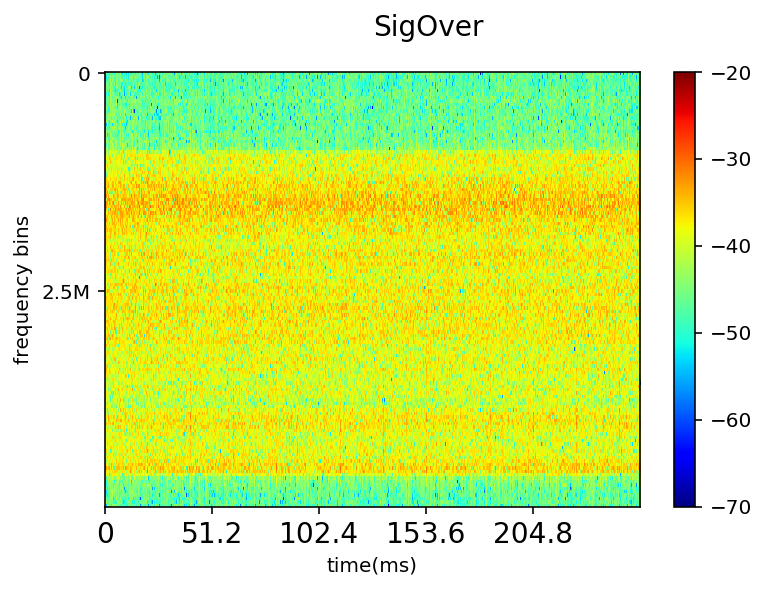

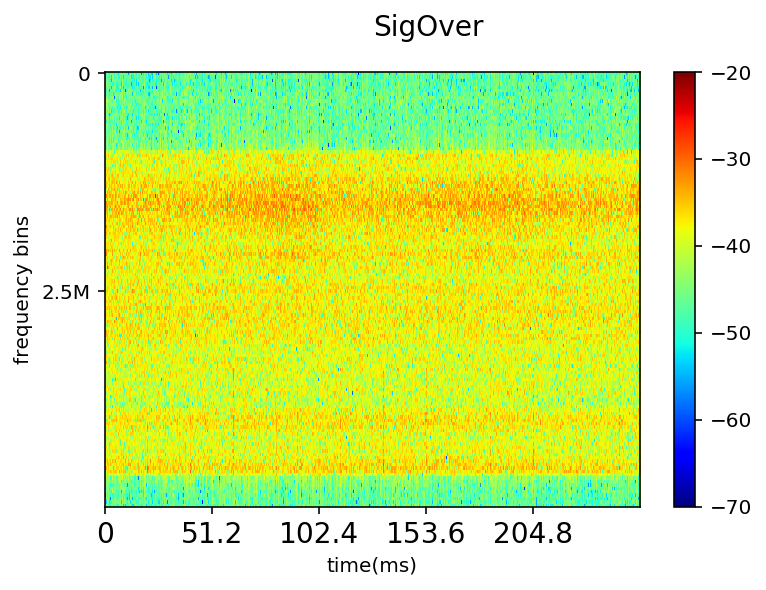

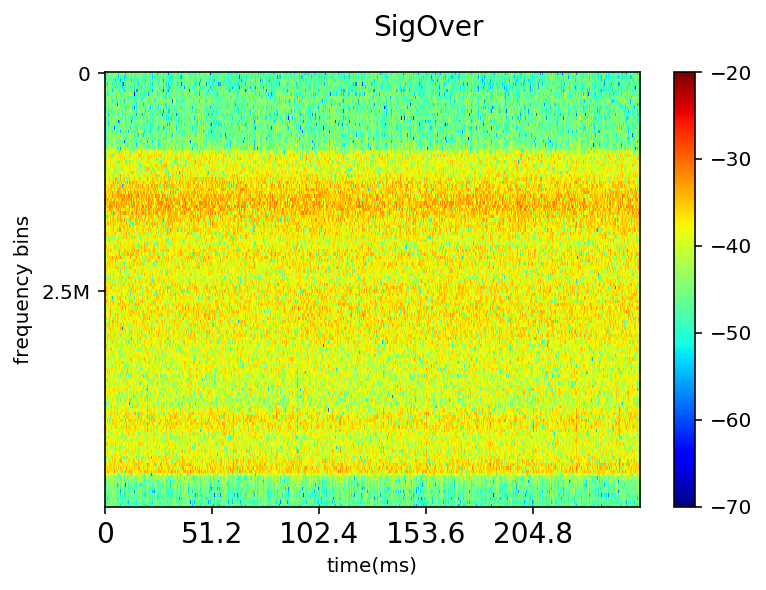

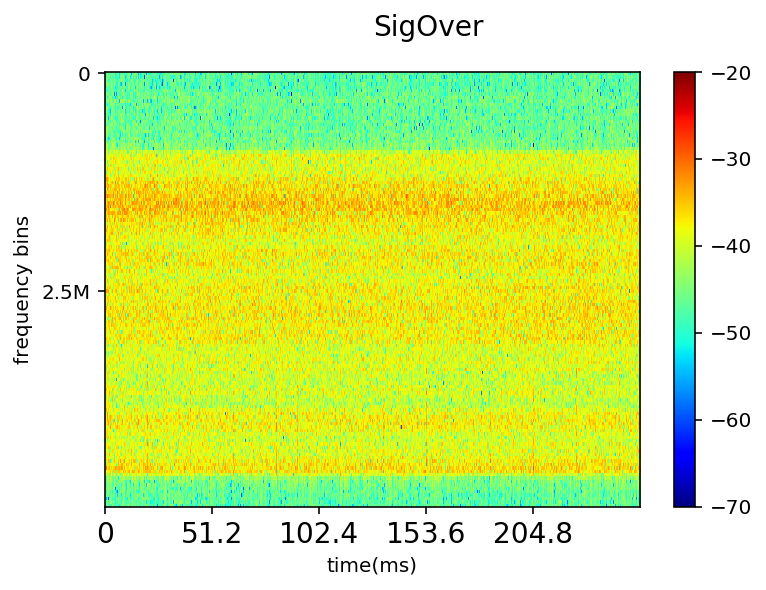

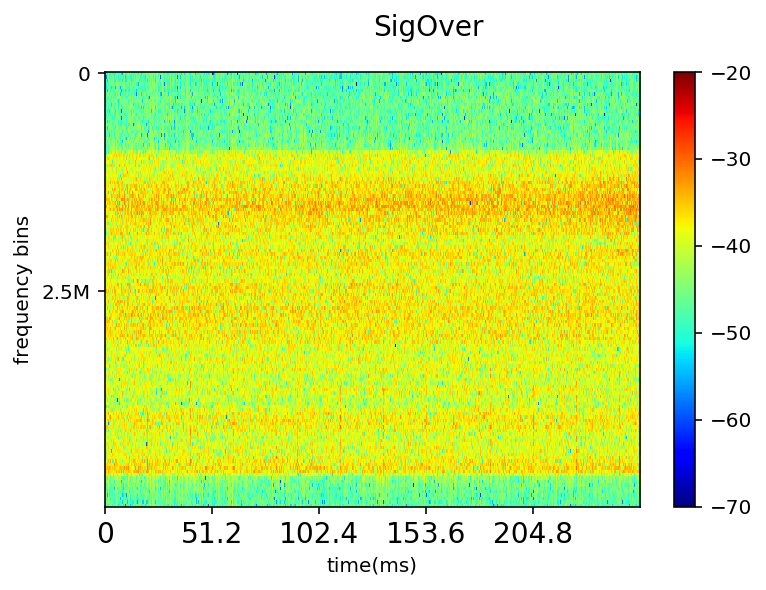

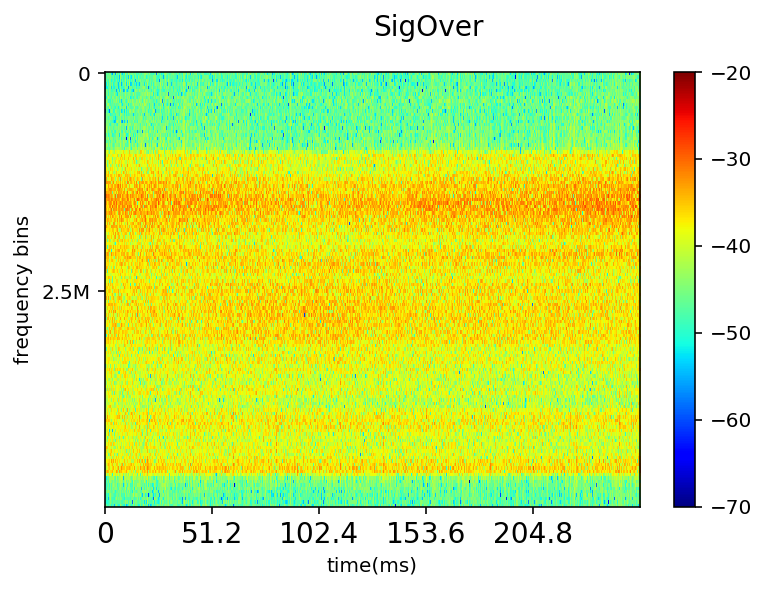

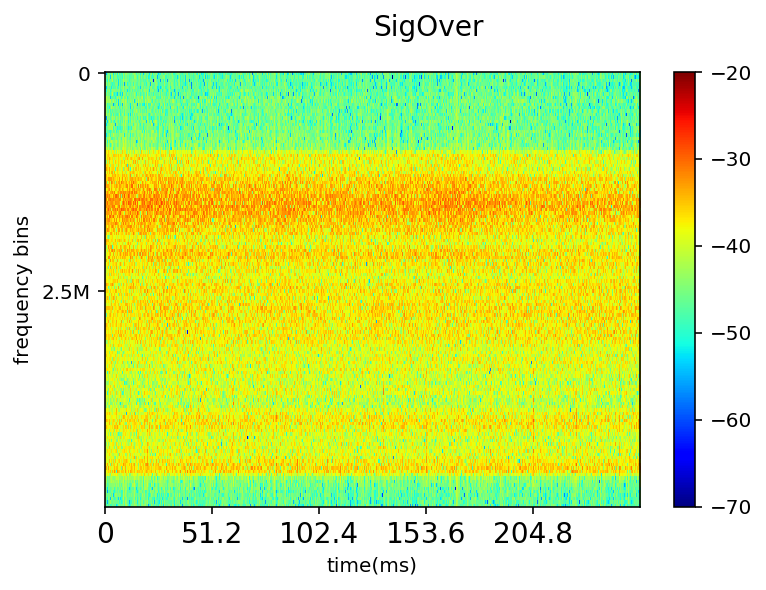

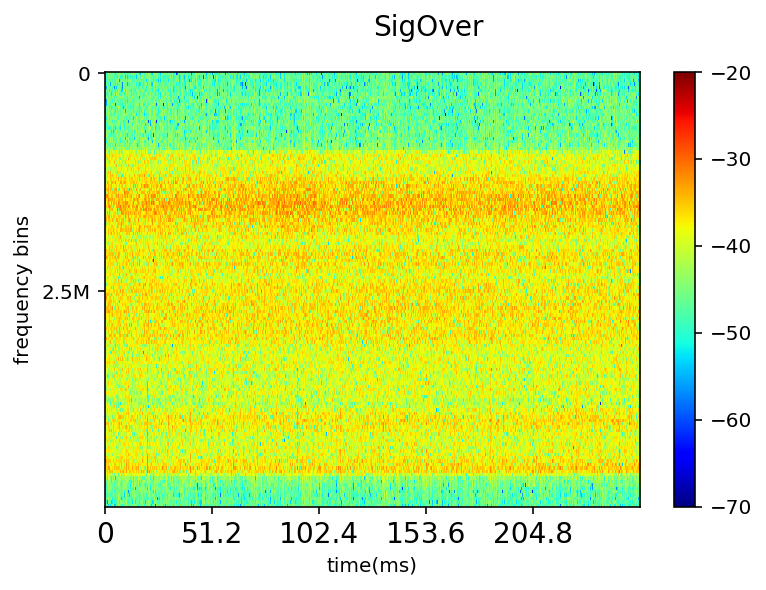

In [4]:
filename = '/net/adv_spectrum/data/downsample/downsample_10/abnormal/ryerson_ab_train_sigOver_10ms/1518561613_880M_5m_sigOver_ap'
plot_single_spec(filename, 'SigOver')

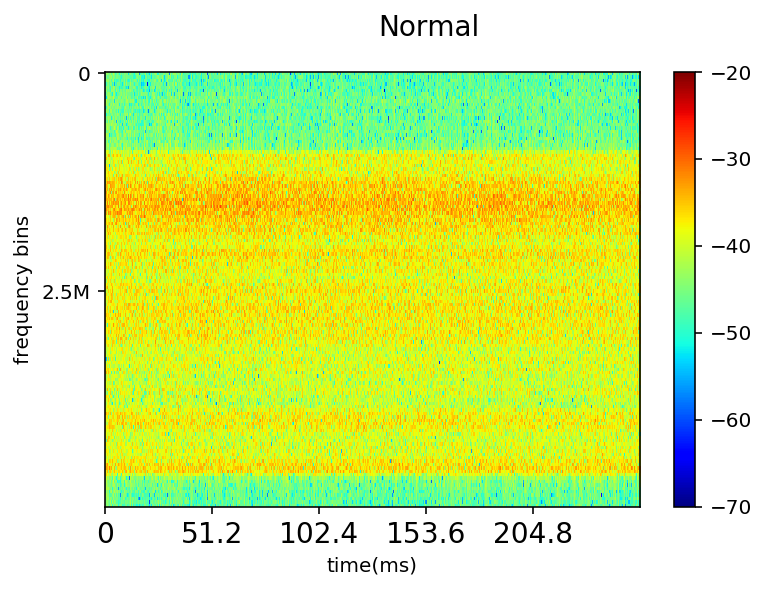

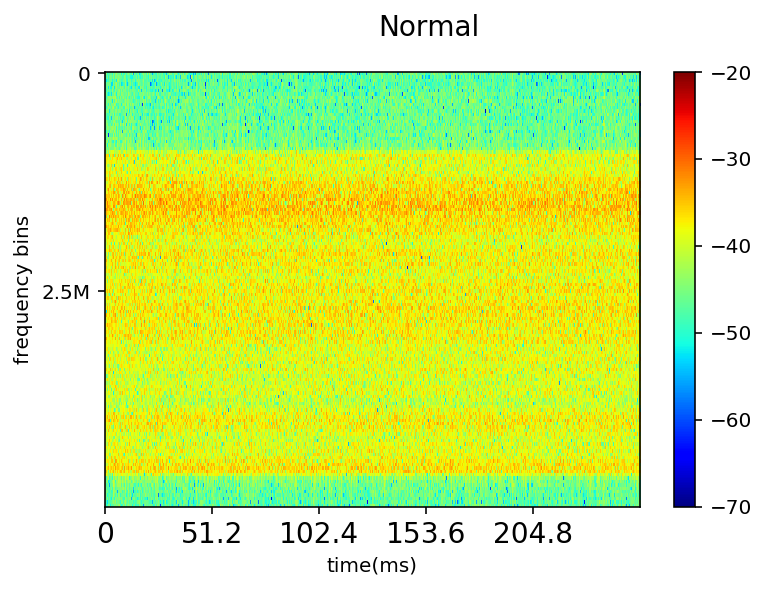

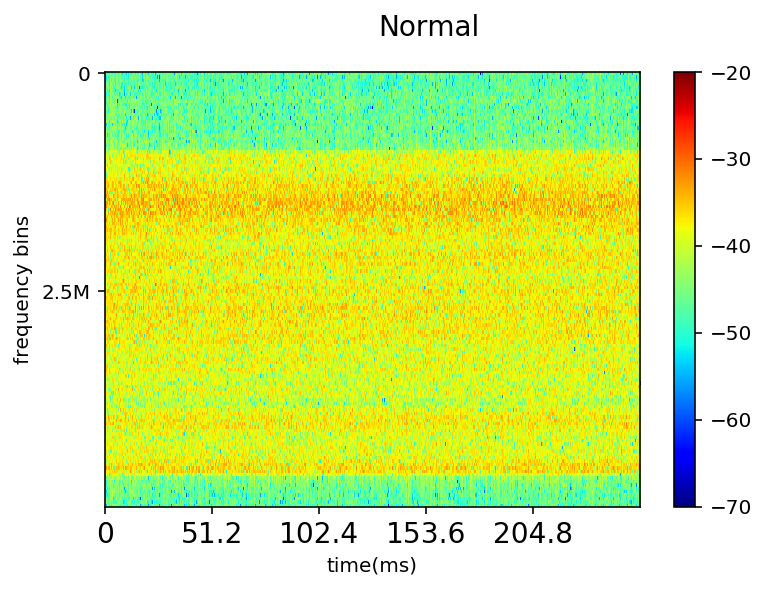

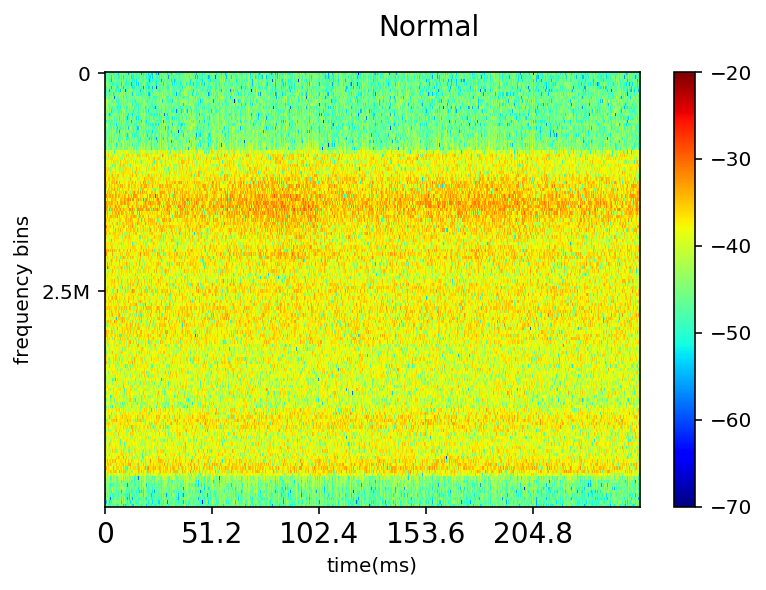

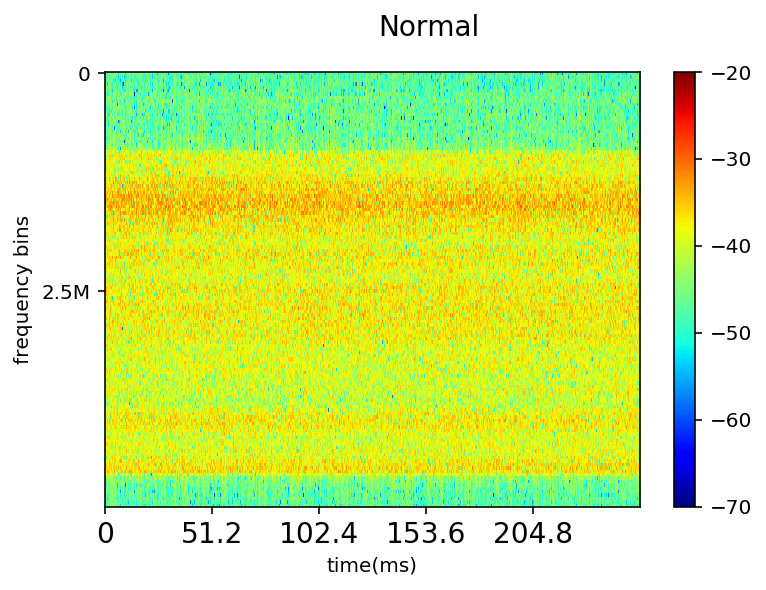

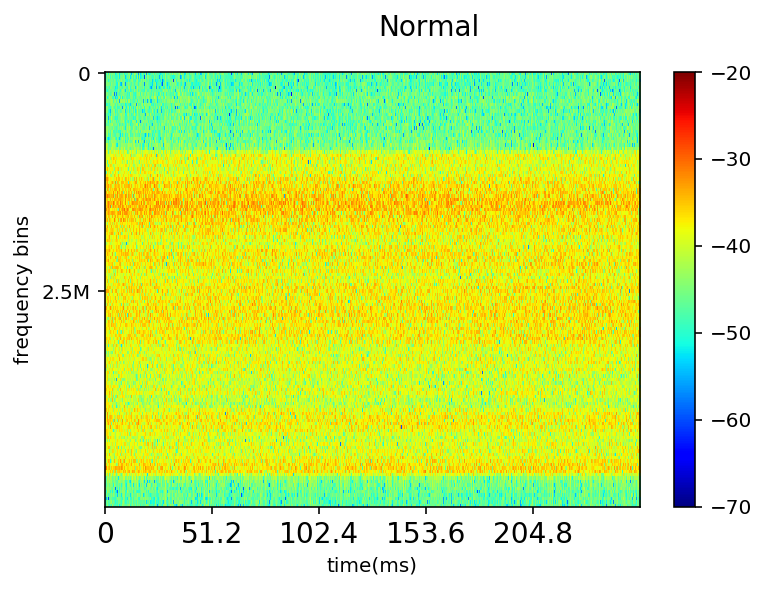

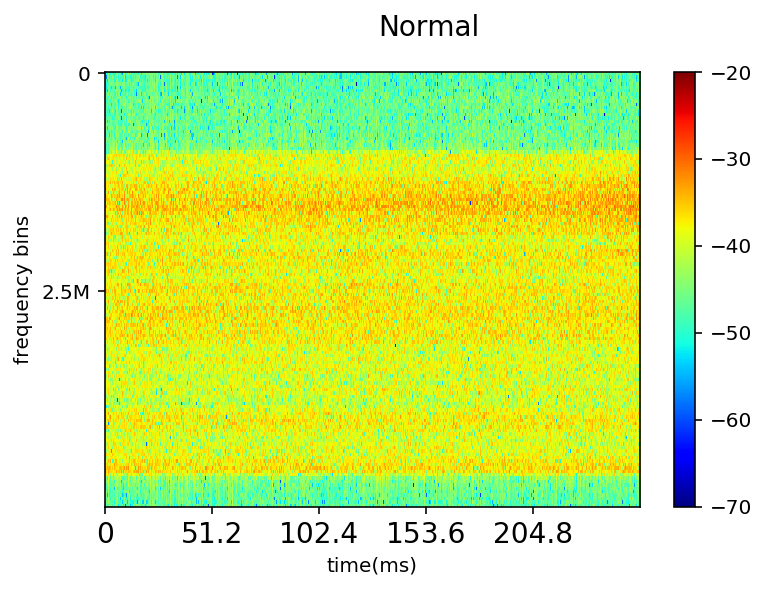

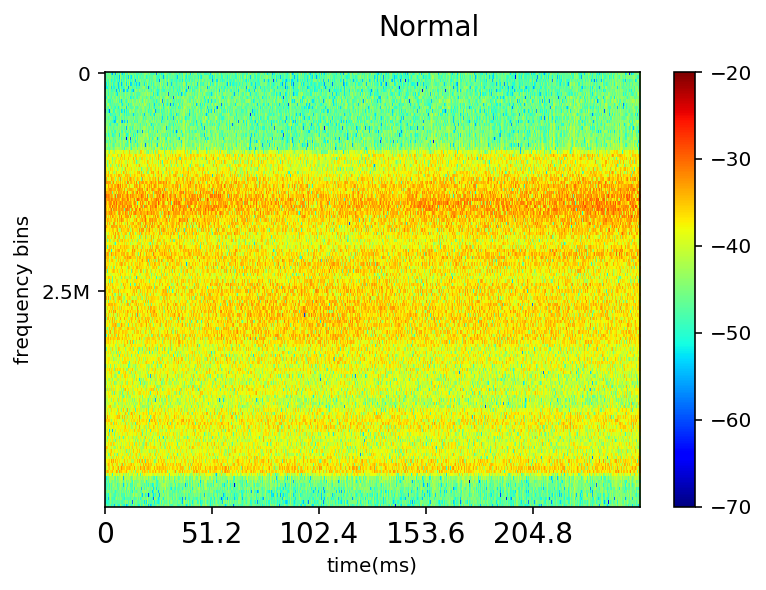

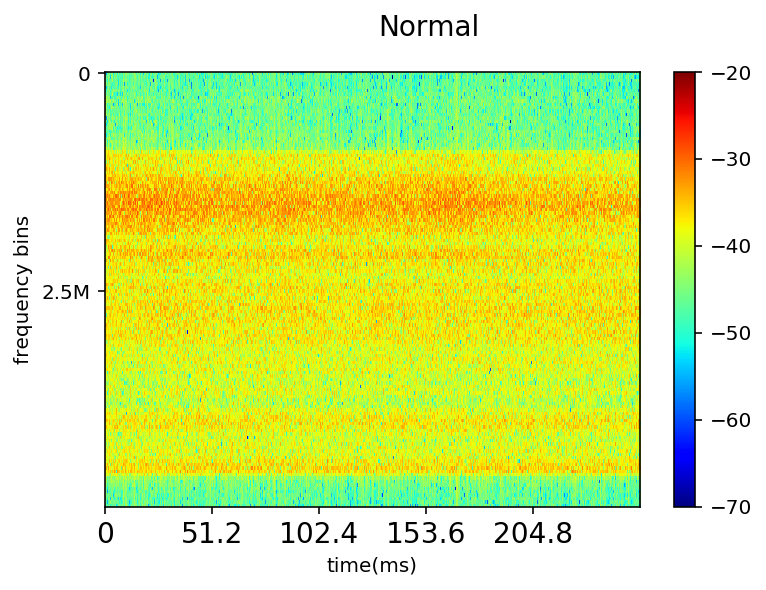

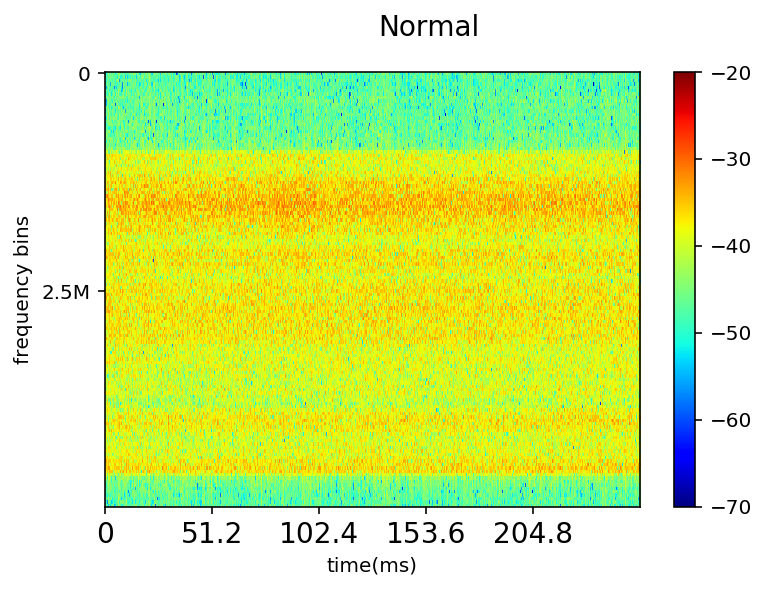

In [6]:
filename = '/net/adv_spectrum/data/downsample/downsample_10/normal/ryerson_ab_train/1518561613_880M_5m_ap'
plot_single_spec(filename, 'Normal')

In [12]:
import glob as glob
ds_spec_path = '/net/adv_spectrum/data/downsample/downsample_10/normal/ryerson_ab_train/'
def folder_to_rss(file_path):
    rss = []
    for filename in sorted(glob.glob(file_path + '*.txt')):
        print('Beginning to process ' + filename)
#         out_file = rss_path + filename.split('/')[-1].replace('_ap.txt', '_rss.txt')
#         oid = open(out_file, 'w')
        with open(filename, 'r') as f:
            for line in f:
                x = line.split()
                power = str(np.mean([float(i) for i in x])) + '\n'
#                 oid.write(power)
                rss.append(power)
                break
            print(np.shape(rss))
            break
    print('RSS of ' + file_path + ' is already constructed.')
    return x, power

x, power = folder_to_rss(ds_spec_path)

Beginning to process /net/adv_spectrum/data/downsample/downsample_10/normal/ryerson_ab_train/1518561613_880M_5m_ap.txt
(1,)
RSS of /net/adv_spectrum/data/downsample/downsample_10/normal/ryerson_ab_train/ is already constructed.


In [20]:
x

['-43.978',
 '-48.883',
 '-44.005',
 '-44.964',
 '-45.730',
 '-43.795',
 '-43.772',
 '-44.164',
 '-44.375',
 '-42.761',
 '-44.016',
 '-43.675',
 '-49.872',
 '-43.633',
 '-45.915',
 '-43.210',
 '-47.528',
 '-45.810',
 '-47.912',
 '-43.247',
 '-47.389',
 '-49.618',
 '-46.402',
 '-44.250',
 '-35.168',
 '-35.797',
 '-34.473',
 '-39.910',
 '-35.210',
 '-41.072',
 '-37.333',
 '-35.268',
 '-39.518',
 '-39.073',
 '-35.003',
 '-36.695',
 '-34.110',
 '-32.802',
 '-36.944',
 '-33.186',
 '-35.901',
 '-33.407',
 '-34.648',
 '-35.759',
 '-35.267',
 '-39.017',
 '-35.837',
 '-35.528',
 '-36.306',
 '-39.464',
 '-41.745',
 '-37.456',
 '-34.467',
 '-41.680',
 '-34.398',
 '-38.413',
 '-33.503',
 '-37.068',
 '-35.969',
 '-46.263',
 '-39.488',
 '-34.639',
 '-33.269',
 '-30.120',
 '-19.045',
 '-31.268',
 '-33.755',
 '-32.916',
 '-34.245',
 '-34.047',
 '-38.232',
 '-35.943',
 '-35.587',
 '-37.365',
 '-35.766',
 '-38.496',
 '-45.171',
 '-40.550',
 '-39.103',
 '-40.246',
 '-43.130',
 '-37.965',
 '-40.209',
 '-4

In [16]:
power

'-39.335406250000005\n'